# Описание проекта

# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости


## Данные

В наличии имеестся отдин датасет со следующими данными:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Задача

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

## Навыки и инструменты
*Python, Pandas, Matplotlib, исследовательский анализ данных, визуализация данных, предобработка данных, math*

## Описание проекта
Проведен исследовательский анализ и предобработка данных для датасета с объявлениями о продаже квартир в Санкт-Петербурге. 
Выявлены, влияние площади, потолков, количества комнат, даты объявления на цены квартир всех представленных населённых пунктов и центра Санкт-Петербурга для построения автоматизированной системы определения цен во избежание мошенничества и аномалий.
На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость
объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.

### Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.1f}'.format

apartments = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
apartments.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,nan,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,nan,0.0,nan,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,nan,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0


In [2]:
print(apartments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

## Таблица содержит в себе архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Она содержит 23699 строк и 22 столбца. Всртечается 4 типа данных: булевые значения (2 столбца), целые числа (3 столбца), вещественные числа (14 столбцов) и строки (3 столбца). В глаза бросается, что у нескольких столбцов меньше значений, чем у всех остальных. Это пропуски и они находятся в следующих столбцах:

* ceiling_height          14504 non-null float64
* floors_total            23613 non-null float64
* living_area             21796 non-null float64
* is_apartment            2775 non-null object
* kitchen_area            21421 non-null float64
* balcony                 12180 non-null float64
* locality_name           23650 non-null object
* airports_nearest        18157 non-null float64
* cityCenters_nearest     18180 non-null float64
* parks_around3000        18181 non-null float64
* parks_nearest           8079 non-null float64
* ponds_around3000        18181 non-null float64
* ponds_nearest           9110 non-null float64
* days_exposition         20518 non-null float64

## Итог: пропуски есть в 14 столбцах - это более половина

### Шаг 2. Предобработка данных

### Обработка пропусков

Определим в каких столбцах нужно убрать пропуски.
Логичто, что это будут те столбцы, которые участвуют в расчетах и/или в получении выводов. Определим эти столбцы. Итак, от меня требуется рассчитать (необходимы данные из столбцов):
* цену квадратного метра (ast_price — цена на момент снятия с публикации, living_area — жилая площадь в квадратных метрах(м²)): есть пропуски в living_area
* день недели, месяц и год публикации объявления (first_day_exposition — дата публикации): пропусков нет
* этаж квартиры; варианты — первый, последний, другой (floor — этаж): есть пропуски в floors_total 
* соотношение жилой и общей площади, а также отношение площади кухни к общей (living_area — жилая площадь в квадратных метрах(м²), total_area — площадь квартиры в квадратных метрах (м²), kitchen_area — площадь кухни в квадратных метрах (м²)): есть пропуски в living_area, kitchen_area

Кроме того нужно определить ряд параметров и ответить на ряд вопросов, а для этого также нужна информация из определенных столбцов:
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков: есть пропуски в ceiling_height 
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?: есть пропуски в days_exposition
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. Есть пропуски в cityCenters_nearest, floors_total
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.: есть пропуски в locality_name
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.: есть пропуски в locality_name
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?: данные параметры рассмотрены выше.

Таким образом нужно убрать пропуски в следующих столбцах:
* living_area
* kitchen_area
* ceiling_height
* floors_total
* days_exposition
* cityCenters_nearest
* locality_name

В остальных столбца пропуски убирать необязательно.

#### Обработаем пропуска в living_area

Проверим пропуски в столбце "living_area"

In [3]:
print(apartments[apartments['living_area'].isnull()].count())

total_images            1903
last_price              1903
total_area              1903
first_day_exposition    1903
rooms                   1903
ceiling_height           797
floors_total            1870
living_area                0
floor                   1903
is_apartment             120
studio                  1903
open_plan               1903
kitchen_area             439
balcony                  498
locality_name           1898
airports_nearest        1278
cityCenters_nearest     1280
parks_around3000        1280
parks_nearest            577
ponds_around3000        1280
ponds_nearest            695
days_exposition         1705
dtype: int64


Анализ показывает 1903 пропуска.

Приведем числовое описание данных в столбце "living_area"

In [4]:
print(apartments["living_area"].describe())

count   21,796.0
mean        34.5
std         22.0
min          2.0
25%         18.6
50%         30.0
75%         42.3
max        409.7
Name: living_area, dtype: float64


Минимальное значение жилой площади квартиры не может быть 2 м.кв. Прежде чем убрать пропуски посмотрим количество неадекватно малениких значений жилой площади квартиры. Если учитывать, что могут попасться комнаты в коммуналках и общежитиях, то неадекватно маленькой площадью будем считать 9 м.кв. Посмотрим, что это за квартиры и сколько таких квартир. 

In [5]:
apartments.query('living_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,"4,000,000.0",21.4,2019-02-07T00:00:00,1,2.9,8.0,8.3,7,NaN,False,False,6.3,nan,Санкт-Петербург,"27,089.0","5,791.0",2.0,488.0,1.0,286.0,nan
2309,10,"4,200,000.0",62.4,2017-06-15T00:00:00,2,2.6,9.0,8.4,6,NaN,False,False,41.0,2.0,посёлок Шушары,"23,662.0","29,448.0",0.0,nan,0.0,nan,111.0
3242,7,"4,440,000.0",41.0,2017-07-02T00:00:00,1,nan,17.0,3.0,17,NaN,False,False,11.0,nan,Санкт-Петербург,"19,272.0","13,073.0",0.0,nan,0.0,nan,216.0
13915,20,"6,350,000.0",52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,nan,Санкт-Петербург,"32,453.0","6,521.0",0.0,nan,1.0,"1,012.0",91.0
16431,13,"3,799,000.0",31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,NaN,False,False,17.0,nan,Санкт-Петербург,"32,177.0","4,826.0",1.0,430.0,0.0,nan,168.0
17248,20,"5,300,000.0",33.0,2017-04-14T00:00:00,1,2.7,22.0,8.9,16,NaN,False,False,16.1,1.0,Санкт-Петербург,"33,803.0","13,671.0",0.0,nan,0.0,nan,216.0
17582,11,"2,680,000.0",22.0,2018-08-11T00:00:00,0,nan,25.0,5.0,8,NaN,True,False,nan,2.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,70.0
19251,19,"4,050,000.0",33.0,2018-10-15T00:00:00,1,2.5,22.0,6.5,21,NaN,False,False,18.0,nan,Санкт-Петербург,"9,258.0","10,592.0",1.0,458.0,0.0,nan,44.0
20994,7,"8,900,000.0",50.6,2018-10-22T00:00:00,2,2.5,7.0,8.0,3,NaN,False,False,31.0,nan,Санкт-Петербург,"12,771.0","8,301.0",1.0,173.0,3.0,126.0,nan
21505,9,"4,100,000.0",35.3,2018-01-10T00:00:00,1,2.8,27.0,8.5,11,NaN,False,False,16.1,2.0,Санкт-Петербург,"33,977.0","15,076.0",0.0,nan,0.0,nan,60.0


In [6]:
apartments.query('living_area < 9')["living_area"]

114     8.3
2309    8.4
3242    3.0
13915   2.0
16431   6.0
17248   8.9
17582   5.0
19251   6.5
20994   8.0
21505   8.5
21758   2.0
21943   5.4
23208   8.0
23574   3.0
Name: living_area, dtype: float64

Всего 14 "малюсеньких" квартир. На самом деле мы видим, что по общей площади это обычные квартиры. Следовательно эти небольшие жилые площади есть ошибка внесения данных. Поэтому пока заменим их жилую площадь на 0 и потом на NaN. Конечно можно замены сделать позже, при использовании графиков, но если я сделаю это сейчас, то при их небольшом количестве это не сильно исказит ситуацию.

In [7]:
apartments['living_area'].replace(apartments[apartments["living_area"] < 9]["living_area"], 0, inplace = True)

Проверим замены

In [8]:
apartments.query('living_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,"4,000,000.0",21.4,2019-02-07T00:00:00,1,2.9,8.0,0.0,7,NaN,False,False,6.3,nan,Санкт-Петербург,"27,089.0","5,791.0",2.0,488.0,1.0,286.0,nan
2309,10,"4,200,000.0",62.4,2017-06-15T00:00:00,2,2.6,9.0,0.0,6,NaN,False,False,41.0,2.0,посёлок Шушары,"23,662.0","29,448.0",0.0,nan,0.0,nan,111.0
3242,7,"4,440,000.0",41.0,2017-07-02T00:00:00,1,nan,17.0,0.0,17,NaN,False,False,11.0,nan,Санкт-Петербург,"19,272.0","13,073.0",0.0,nan,0.0,nan,216.0
13915,20,"6,350,000.0",52.0,2018-02-06T00:00:00,2,3.0,6.0,0.0,2,NaN,False,False,9.0,nan,Санкт-Петербург,"32,453.0","6,521.0",0.0,nan,1.0,"1,012.0",91.0
16431,13,"3,799,000.0",31.0,2018-04-12T00:00:00,1,2.6,5.0,0.0,1,NaN,False,False,17.0,nan,Санкт-Петербург,"32,177.0","4,826.0",1.0,430.0,0.0,nan,168.0
17248,20,"5,300,000.0",33.0,2017-04-14T00:00:00,1,2.7,22.0,0.0,16,NaN,False,False,16.1,1.0,Санкт-Петербург,"33,803.0","13,671.0",0.0,nan,0.0,nan,216.0
17582,11,"2,680,000.0",22.0,2018-08-11T00:00:00,0,nan,25.0,0.0,8,NaN,True,False,nan,2.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,70.0
19251,19,"4,050,000.0",33.0,2018-10-15T00:00:00,1,2.5,22.0,0.0,21,NaN,False,False,18.0,nan,Санкт-Петербург,"9,258.0","10,592.0",1.0,458.0,0.0,nan,44.0
20994,7,"8,900,000.0",50.6,2018-10-22T00:00:00,2,2.5,7.0,0.0,3,NaN,False,False,31.0,nan,Санкт-Петербург,"12,771.0","8,301.0",1.0,173.0,3.0,126.0,nan
21505,9,"4,100,000.0",35.3,2018-01-10T00:00:00,1,2.8,27.0,0.0,11,NaN,False,False,16.1,2.0,Санкт-Петербург,"33,977.0","15,076.0",0.0,nan,0.0,nan,60.0


Заменим 0 на NaN

In [9]:
apartments['living_area'] = apartments['living_area'].replace(0, np.nan)

Проверим 0

In [10]:
apartments.query('living_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Все Ок! Замены прошли.

In [11]:
print(apartments[apartments['living_area'].isnull()].count())

total_images            1917
last_price              1917
total_area              1917
first_day_exposition    1917
rooms                   1917
ceiling_height           807
floors_total            1884
living_area                0
floor                   1917
is_apartment             120
studio                  1917
open_plan               1917
kitchen_area             451
balcony                  504
locality_name           1912
airports_nearest        1291
cityCenters_nearest     1293
parks_around3000        1293
parks_nearest            585
ponds_around3000        1293
ponds_nearest            701
days_exposition         1717
dtype: int64


Видим, что к бывшим пропускам прибавилось еще 14, которые раньше были < 9 кв.м. Теперь NaN нужно заменить на релевантные значения жилой площади. Посмотрим с каким показателем в таблице больше всего коррелирует жилая площадь.

In [12]:
print((apartments.corr()["living_area"]).sort_values(ascending = False))

living_area            1.0
total_area             0.9
rooms                  0.8
last_price             0.6
kitchen_area           0.4
parks_around3000       0.2
ponds_around3000       0.1
days_exposition        0.1
total_images           0.1
ceiling_height         0.1
balcony                0.0
open_plan             -0.0
parks_nearest         -0.1
studio                -0.1
airports_nearest      -0.1
ponds_nearest         -0.1
floor                 -0.1
floors_total          -0.2
cityCenters_nearest   -0.2
Name: living_area, dtype: float64


Видим, что наибольшая корреляция жилой площади с общей площадью. Это кажется логичным.
Теперь самое врямя рассчитать релевантное значение жилой площади при соответсвующей общей площади и заменить NaN на эти значения.
### Но применять для рассчетов я буду не общую площадь, а количество комнат, поскольку при расчетах с общей площадью не обрабатывается 145 NaN. Корреляция позволяет брать rooms (0,84)                 

In [13]:
apartments['living_area'] = (apartments.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.mean())))

Проверим как произошли замены

In [14]:
print(apartments["living_area"].describe())

count   23,699.0
mean        34.5
std         21.8
min          9.0
25%         18.4
50%         30.3
75%         42.7
max        409.7
Name: living_area, dtype: float64


In [15]:
print(apartments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Заменилось все, показатели правдоподобные. Идем дальше.

#### Обработаем пропуска в kitchen_area

Проверим пропуски в столбце "kitchen_area"

In [16]:
print(apartments[apartments['kitchen_area'].isnull()].count())

total_images            2278
last_price              2278
total_area              2278
first_day_exposition    2278
rooms                   2278
ceiling_height           940
floors_total            2231
living_area             2278
floor                   2278
is_apartment             190
studio                  2278
open_plan               2278
kitchen_area               0
balcony                  729
locality_name           2269
airports_nearest        1561
cityCenters_nearest     1563
parks_around3000        1563
parks_nearest            690
ponds_around3000        1563
ponds_nearest            844
days_exposition         2075
dtype: int64


Анализ показывает 2278 пропуска.

Приведем числовое описание данных в столбце "kitchen_area"

In [17]:
print(apartments["kitchen_area"].describe())

count   21,421.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64


### Минимальное значение площади кухни не может быть 1,3 м.кв. Прежде чем убрать пропуски посмотрим количество неадекватно малениких значений площади кухни. Если учитывать среднеквадратичное отклонение, то можно заметить, что площадь кухни очень редно будет меньше 3,5 метров. Ее и  будем считать неадекватно маленькой площадью кухни. Посмотрим, что это за квартиры с такими кухнями и сколько таких квартир. 

In [18]:
apartments.query('kitchen_area < 3.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,"2,600,000.0",27.0,2017-07-10T00:00:00,1,2.8,23.0,18.0,18,NaN,False,False,2.0,0.0,Санкт-Петербург,"22,131.0","17,459.0",0.0,nan,1.0,411.0,10.0
2165,15,"3,180,000.0",25.0,2019-03-21T00:00:00,1,2.5,25.0,17.0,17,NaN,False,False,3.0,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,19.0
3078,17,"6,000,000.0",43.0,2018-11-12T00:00:00,2,2.9,4.0,29.3,2,NaN,False,False,3.2,nan,Санкт-Петербург,"22,357.0","5,247.0",1.0,319.0,2.0,831.0,37.0
6084,6,"770,000.0",18.0,2017-10-16T00:00:00,1,nan,5.0,13.0,4,NaN,False,False,3.0,nan,Тихвин,nan,nan,nan,nan,nan,nan,90.0
6262,9,"3,100,000.0",24.0,2018-06-25T00:00:00,2,3.0,5.0,16.0,5,NaN,False,False,2.0,nan,Санкт-Петербург,"31,960.0","4,914.0",2.0,426.0,1.0,936.0,54.0
7950,3,"5,967,734.0",66.4,2017-02-07T00:00:00,2,nan,4.0,44.4,2,False,False,False,2.9,nan,Санкт-Петербург,"44,870.0","20,802.0",0.0,nan,0.0,nan,335.0
8729,9,"2,200,000.0",18.4,2018-08-20T00:00:00,1,2.5,3.0,14.0,3,NaN,False,False,2.4,nan,Пушкин,"20,710.0","30,687.0",0.0,nan,1.0,155.0,59.0
9138,17,"2,920,000.0",23.3,2018-12-12T00:00:00,1,nan,3.0,21.0,1,NaN,False,False,2.0,nan,Санкт-Петербург,"19,506.0","4,008.0",0.0,nan,2.0,45.0,107.0
10208,3,"1,900,000.0",17.0,2018-08-14T00:00:00,1,2.8,4.0,13.0,2,False,False,False,3.0,nan,Санкт-Петербург,"25,072.0","5,639.0",0.0,nan,0.0,nan,7.0
11033,6,"5,350,000.0",32.0,2016-04-20T00:00:00,1,nan,14.0,16.0,10,NaN,False,False,2.0,0.0,Санкт-Петербург,"19,008.0","3,953.0",0.0,nan,1.0,69.0,210.0


In [19]:
apartments.query('kitchen_area < 3.5')["kitchen_area"]

906     2.0
2165    3.0
3078    3.2
6084    3.0
6262    2.0
7950    2.9
8729    2.4
9138    2.0
10208   3.0
11033   2.0
12595   3.4
13814   3.0
14836   3.3
15014   3.0
16367   2.0
17424   3.0
17834   2.3
18066   3.0
19642   2.0
20217   1.3
21419   2.0
Name: kitchen_area, dtype: float64

Всего 21 "малюсенькая" кухня. Мы видим, что по общей площади это квартиры меньше среднего, но все равно площадь кухонь явно посчитали с ошибкой. Это ощибка внесения данных. Поэтому пока изменим площадь на 0 и потом на NaN. Конечно можно замены сделать позже, при использовании графиков, но если я сделаю это сейчас, то при их небольшом количестве это не сильно исказит ситуацию.

In [20]:
apartments['kitchen_area'].replace(apartments[apartments["kitchen_area"] < 3.5]["kitchen_area"], 0, inplace = True)

Проверим замены

In [21]:
apartments.query('kitchen_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,"2,600,000.0",27.0,2017-07-10T00:00:00,1,2.8,23.0,18.0,18,NaN,False,False,0.0,0.0,Санкт-Петербург,"22,131.0","17,459.0",0.0,nan,1.0,411.0,10.0
2165,15,"3,180,000.0",25.0,2019-03-21T00:00:00,1,2.5,25.0,17.0,17,NaN,False,False,0.0,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,19.0
3078,17,"6,000,000.0",43.0,2018-11-12T00:00:00,2,2.9,4.0,29.3,2,NaN,False,False,0.0,nan,Санкт-Петербург,"22,357.0","5,247.0",1.0,319.0,2.0,831.0,37.0
6084,6,"770,000.0",18.0,2017-10-16T00:00:00,1,nan,5.0,13.0,4,NaN,False,False,0.0,nan,Тихвин,nan,nan,nan,nan,nan,nan,90.0
6262,9,"3,100,000.0",24.0,2018-06-25T00:00:00,2,3.0,5.0,16.0,5,NaN,False,False,0.0,nan,Санкт-Петербург,"31,960.0","4,914.0",2.0,426.0,1.0,936.0,54.0
7950,3,"5,967,734.0",66.4,2017-02-07T00:00:00,2,nan,4.0,44.4,2,False,False,False,0.0,nan,Санкт-Петербург,"44,870.0","20,802.0",0.0,nan,0.0,nan,335.0
8729,9,"2,200,000.0",18.4,2018-08-20T00:00:00,1,2.5,3.0,14.0,3,NaN,False,False,0.0,nan,Пушкин,"20,710.0","30,687.0",0.0,nan,1.0,155.0,59.0
9138,17,"2,920,000.0",23.3,2018-12-12T00:00:00,1,nan,3.0,21.0,1,NaN,False,False,0.0,nan,Санкт-Петербург,"19,506.0","4,008.0",0.0,nan,2.0,45.0,107.0
10208,3,"1,900,000.0",17.0,2018-08-14T00:00:00,1,2.8,4.0,13.0,2,False,False,False,0.0,nan,Санкт-Петербург,"25,072.0","5,639.0",0.0,nan,0.0,nan,7.0
11033,6,"5,350,000.0",32.0,2016-04-20T00:00:00,1,nan,14.0,16.0,10,NaN,False,False,0.0,0.0,Санкт-Петербург,"19,008.0","3,953.0",0.0,nan,1.0,69.0,210.0


Заменим 0 на NaN

In [22]:
apartments['kitchen_area'] = apartments['kitchen_area'].replace(0, np.nan)

Проверим 0

In [23]:
apartments.query('kitchen_area == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [24]:
print(apartments[apartments['kitchen_area'].isnull()].count())

total_images            2299
last_price              2299
total_area              2299
first_day_exposition    2299
rooms                   2299
ceiling_height           953
floors_total            2252
living_area             2299
floor                   2299
is_apartment             192
studio                  2299
open_plan               2299
kitchen_area               0
balcony                  737
locality_name           2290
airports_nearest        1579
cityCenters_nearest     1581
parks_around3000        1581
parks_nearest            694
ponds_around3000        1581
ponds_nearest            854
days_exposition         2095
dtype: int64


Видим, что к бывшим пропускам прибавилось еще 21, которые раньше были < 3,5 кв.м. Теперь NaN нужно заменить на релевантные значения кухонь. Посмотрим с каким показателем в таблице больше всего коррелирует площадь кухонь.

In [25]:
print((apartments.corr()["kitchen_area"]).sort_values(ascending = False))

kitchen_area           1.0
total_area             0.6
last_price             0.5
living_area            0.4
rooms                  0.3
floors_total           0.2
ponds_around3000       0.2
floor                  0.1
total_images           0.1
days_exposition        0.1
balcony                0.1
ceiling_height         0.1
parks_around3000       0.1
parks_nearest          0.0
airports_nearest       0.0
ponds_nearest         -0.1
cityCenters_nearest   -0.2
studio                 nan
open_plan              nan
Name: kitchen_area, dtype: float64


Видим, что наибольшая корреляция площади кухни с общей площадью. Это кажется логичным.
Теперь самое врямя рассчитать релевантное значение площади кухни при соответсвующей общей площади и заменить NaN на эти значения. После замены нужно проверить студии и открытые планировки. Там кухонь нет и должны остаться NaN.

In [26]:
apartments['kitchen_area'] = apartments['kitchen_area'].fillna(apartments.groupby('total_area')['kitchen_area'].transform('mean'))

Проверим как произошли замены.

In [27]:
apartments[apartments['kitchen_area'].isnull()].count()

total_images            219
last_price              219
total_area              219
first_day_exposition    219
rooms                   219
ceiling_height           76
floors_total            199
living_area             219
floor                   219
is_apartment             15
studio                  219
open_plan               219
kitchen_area              0
balcony                 100
locality_name           219
airports_nearest        141
cityCenters_nearest     141
parks_around3000        141
parks_nearest            64
ponds_around3000        141
ponds_nearest            97
days_exposition         208
dtype: int64

Мы видим, что замены не прошли в 219 строках. Причина ясна. При расчете среднего в ряде случаев подучились слишком малы группы после работы функции groupby. Все значения по ячейкам "kitchen_area" в этих группах оказались NaN и поэтому среднее не посчиталось. Это наглядно видно ниже.   

In [28]:
i = 0
for name, group_data in apartments.groupby('total_area')['kitchen_area']:
    print(name)
    print(group_data)
    print(group_data.mean())
    print()
    i = i + 1
    if i > 5:
        break

12.0
19904   nan
Name: kitchen_area, dtype: float64
nan

13.0
17961   nan
19546   nan
19807   nan
Name: kitchen_area, dtype: float64
nan

13.2
19558   nan
Name: kitchen_area, dtype: float64
nan

14.0
19642   nan
Name: kitchen_area, dtype: float64
nan

15.0
12040   nan
16949   nan
Name: kitchen_area, dtype: float64
nan

15.5
8886   nan
Name: kitchen_area, dtype: float64
nan



Но мы помним про высокую корреляцию площади кухонь с общей площадью. Замени пропуски на площадь кухи, посчитанную как % от общей площади.  

In [29]:
part_kitchen_area = apartments["kitchen_area"].sum()/apartments["total_area"].sum()
part_kitchen_area

0.17280540957038498

Теперь заменим все значения NaN в столбце kitchen_area на 17% от total_area в каждой строке.  

In [30]:
apartments['kitchen_area'] = apartments['kitchen_area'].fillna(value = apartments[apartments['kitchen_area'].isnull()]['total_area'] * 0.17)

Проверим замены

In [31]:
apartments[apartments['kitchen_area'].isnull()].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [32]:
print(apartments["kitchen_area"].describe())

count   23,699.0
mean        10.5
std          5.9
min          2.0
25%          7.0
50%          9.1
75%         11.9
max        112.0
Name: kitchen_area, dtype: float64


Замены прошли нормально.

Видим, что опять появлись кухни < 3.5 м.кв. Избавимся от них.

In [33]:
apartments['kitchen_area'].replace(apartments[apartments["kitchen_area"] < 3.5]["kitchen_area"], 3.5, inplace = True)

Проверим

In [34]:
apartments.query("kitchen_area < 3.5").count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Все Ок!

Посмотрим, что получилось со студиями и свободными планировками.

In [35]:
apartments.query("studio == True")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,"2,450,000.0",27.0,2017-03-30T00:00:00,0,nan,24.0,15.5,2,NaN,True,False,6.2,2.0,посёлок Мурино,nan,nan,nan,nan,nan,nan,181.0
440,8,"2,480,000.0",27.1,2018-03-12T00:00:00,0,nan,17.0,24.8,4,NaN,True,False,4.6,2.0,Санкт-Петербург,"38,171.0","15,015.0",0.0,nan,2.0,982.0,64.0
608,2,"1,850,000.0",25.0,2019-02-20T00:00:00,0,nan,10.0,19.0,7,NaN,True,False,5.9,nan,посёлок Шушары,nan,nan,nan,nan,nan,nan,29.0
697,12,"2,500,000.0",24.1,2017-12-01T00:00:00,0,2.8,25.0,17.5,21,NaN,True,False,4.1,nan,деревня Кудрово,nan,nan,nan,nan,nan,nan,201.0
716,5,"1,500,000.0",17.0,2017-06-07T00:00:00,0,2.7,9.0,12.0,1,NaN,True,False,3.5,0.0,посёлок Шушары,"18,654.0","29,846.0",0.0,nan,0.0,nan,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,"3,090,000.0",30.0,2017-12-17T00:00:00,0,nan,25.0,18.2,5,NaN,True,False,6.5,nan,Санкт-Петербург,"35,250.0","16,414.0",0.0,nan,1.0,400.0,211.0
22877,2,"4,280,000.0",28.0,2017-10-26T00:00:00,0,2.7,19.0,18.0,10,NaN,True,False,6.2,nan,Санкт-Петербург,"18,982.0","7,206.0",0.0,nan,1.0,415.0,151.0
23210,7,"3,200,000.0",26.0,2017-09-01T00:00:00,0,nan,25.0,18.0,16,NaN,True,False,6.0,0.0,Санкт-Петербург,"11,405.0","13,222.0",0.0,nan,1.0,623.0,14.0
23554,15,"3,350,000.0",26.0,2018-09-07T00:00:00,0,nan,19.0,19.0,8,NaN,True,False,6.0,nan,Санкт-Петербург,"18,090.0","17,092.0",0.0,nan,2.0,112.0,31.0


In [36]:
apartments.query("open_plan == True")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,"2,320,000.0",25.0,2017-09-27T00:00:00,0,nan,14.0,17.0,1,NaN,False,True,5.9,0.0,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.0
508,0,"3,375,000.0",34.4,2017-03-28T00:00:00,0,nan,26.0,24.3,19,NaN,False,True,8.3,1.0,посёлок Парголово,"53,115.0","19,292.0",0.0,nan,1.0,593.0,430.0
780,9,"2,600,000.0",26.1,2018-02-20T00:00:00,0,nan,18.0,19.0,8,NaN,False,True,4.4,1.0,посёлок Мурино,nan,nan,nan,nan,nan,nan,45.0
839,14,"1,900,000.0",35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,False,True,8.7,1.0,поселок Новый Свет,nan,nan,nan,nan,nan,nan,7.0
946,5,"2,200,000.0",23.0,2016-09-27T00:00:00,0,nan,27.0,18.0,7,NaN,False,True,6.0,2.0,посёлок Мурино,nan,nan,nan,nan,nan,nan,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,"2,450,000.0",28.5,2017-11-22T00:00:00,0,nan,12.0,18.0,7,NaN,False,True,5.7,2.0,Санкт-Петербург,"20,381.0","19,383.0",0.0,nan,1.0,579.0,73.0
21628,9,"3,900,000.0",34.0,2017-03-18T00:00:00,0,nan,20.0,24.0,10,NaN,False,True,8.5,2.0,Санкт-Петербург,"15,506.0","13,615.0",0.0,nan,1.0,767.0,320.0
22573,8,"2,250,000.0",24.0,2017-09-28T00:00:00,0,nan,12.0,15.0,3,NaN,False,True,5.8,2.0,городской посёлок Новоселье,nan,nan,nan,nan,nan,nan,45.0
23442,0,"2,500,000.0",27.7,2017-09-28T00:00:00,0,nan,24.0,18.0,4,NaN,False,True,4.7,2.0,посёлок Мурино,nan,nan,nan,nan,nan,nan,4.0


Заменим 0 на NaN в обоих случаях

In [37]:
apartments['kitchen_area'].replace(apartments[apartments["studio"] == True]["kitchen_area"], np.nan, inplace = True)
apartments['kitchen_area'].replace(apartments[apartments["open_plan"] == True]["kitchen_area"], np.nan, inplace = True)

Проверяем. что получилось

In [38]:
print(apartments.query("studio == True").count())
print()
print(apartments.query("open_plan == True").count())

total_images            149
last_price              149
total_area              149
first_day_exposition    149
rooms                   149
ceiling_height           77
floors_total            146
living_area             149
floor                   149
is_apartment             15
studio                  149
open_plan               149
kitchen_area              0
balcony                  91
locality_name           149
airports_nearest         92
cityCenters_nearest      92
parks_around3000         92
parks_nearest            21
ponds_around3000         92
ponds_nearest            51
days_exposition         135
dtype: int64

total_images            67
last_price              67
total_area              67
first_day_exposition    67
rooms                   67
ceiling_height          15
floors_total            67
living_area             67
floor                   67
is_apartment             7
studio                  67
open_plan               67
kitchen_area             0
balcony            

Видим, что замены произошли.

In [39]:
print(apartments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23483 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [40]:
print(apartments["kitchen_area"].describe())

count   23,483.0
mean        10.6
std          5.9
min          3.5
25%          7.1
50%          9.2
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64


Видим, что все пропуски отработаны, значения адекватные. Идем дальше.

#### Обработаем пропуска в ceiling_height

Проверим пропуски в столбце "ceiling_height"

In [41]:
print(apartments[apartments['ceiling_height'].isnull()].count())

total_images            9195
last_price              9195
total_area              9195
first_day_exposition    9195
rooms                   9195
ceiling_height             0
floors_total            9118
living_area             9195
floor                   9195
is_apartment             913
studio                  9195
open_plan               9195
kitchen_area            9071
balcony                 4923
locality_name           9160
airports_nearest        6617
cityCenters_nearest     6620
parks_around3000        6620
parks_nearest           2785
ponds_around3000        6620
ponds_nearest           3378
days_exposition         8467
dtype: int64


Анализ показывает 9195 пропуска.

Приведем числовое описание данных в столбце "ceiling_height"

In [42]:
print(apartments["ceiling_height"].describe())

count   14,504.0
mean         2.8
std          1.3
min          1.0
25%          2.5
50%          2.6
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64


Показатели вполне адекватные 

Видим, что чаще всего это ощибка вснесения данных. Не там запятую поставил, не ту цифру написал. Поэтому пока изменим неадекватные высоты на NaN. Конечно можно замены сделать позже, при использовании графиков, но если я сделаю это сейчас, то при их небольшом количестве это не сильно исказит ситуацию.

In [43]:
apartments['ceiling_height'].replace(apartments[apartments["ceiling_height"] > 6]["ceiling_height"], np.nan, inplace = True)

In [44]:
apartments['ceiling_height'].replace(apartments[apartments["ceiling_height"] < 2]["ceiling_height"], np.nan, inplace = True)

Проверим замены

In [45]:
apartments.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [46]:
apartments.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь займемся пропусками. Посмотрим с чем коррелирует высота потолков.

In [47]:
print((apartments.corr()["ceiling_height"]).sort_values(ascending = False))

ceiling_height         1.0
total_area             0.5
living_area            0.4
kitchen_area           0.4
last_price             0.4
rooms                  0.3
parks_around3000       0.3
ponds_around3000       0.2
days_exposition        0.1
total_images           0.0
studio                 0.0
open_plan              0.0
floor                 -0.0
parks_nearest         -0.1
balcony               -0.1
floors_total          -0.1
airports_nearest      -0.1
ponds_nearest         -0.1
cityCenters_nearest   -0.4
Name: ceiling_height, dtype: float64


Видим, что наибольшая корреляция высоты потолков с total_area, living_area, last_price. Это кажется логичным. Чем больше площадь жилья, тем оно более примеальное и тем выше потолки. В большом пмещении низкие потолки очень плохо смотряться  и их делают выше. Тоже относится к цене. Чем дороже жилье тем оно элитнее, больше и потоли выше.
Теперь самое врямя рассчитать релевантное значение жилой площади при соответсвующей общей площади и заменить NaN на эти значения. Округлим пока значения в указанных столбцах до десятых, чтобы избежать проблемы описанной выше - маленькие группы с NaN после groupby, по которым невозможно рассчитать среднее для замены. Округление практически не скажется на получение результатов нашего исследования.              

In [48]:
apartments['total_area'] = round(apartments['total_area'], 1)

In [49]:
apartments['living_area'] = round(apartments['living_area'], 1)

In [50]:
apartments['ceiling_height'] = (apartments.groupby('living_area')['ceiling_height'].transform(lambda x: x.fillna(x.mean())))

In [51]:
apartments['ceiling_height'] = (apartments.groupby('last_price')['ceiling_height'].transform(lambda x: x.fillna(x.mean())))

In [52]:
apartments['ceiling_height'] = (apartments.groupby('total_area')['ceiling_height'].transform(lambda x: x.fillna(x.mean())))

Проверим как произошли замены

In [53]:
print(apartments["ceiling_height"].describe())

count   23,686.0
mean         2.7
std          0.2
min          2.0
25%          2.6
50%          2.7
75%          2.8
max          6.0
Name: ceiling_height, dtype: float64


In [54]:
print(apartments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23686 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23483 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Заменилось все, кроме 13 квартир. Показатели правдоподобные. Посмотрим, что это за квартиры

In [55]:
apartments[apartments['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1928,11,"125,000,000.0",224.5,2017-01-24T00:00:00,4,nan,4.0,163.5,3,False,False,False,30.0,1.0,Санкт-Петербург,"22,805.0","2,335.0",0.0,nan,2.0,497.0,174.0
5956,10,"25,600,000.0",159.3,2014-12-09T00:00:00,4,nan,8.0,86.6,3,NaN,False,False,22.5,nan,Санкт-Петербург,"39,393.0","11,096.0",1.0,537.0,0.0,nan,nan
8242,7,"42,000,000.0",224.3,2017-11-22T00:00:00,5,nan,5.0,154.7,4,NaN,False,False,25.3,nan,Санкт-Петербург,"24,821.0","5,389.0",1.0,511.0,0.0,nan,90.0
10177,9,"13,030,000.0",130.3,2017-10-20T00:00:00,6,nan,5.0,93.0,2,NaN,False,False,10.3,nan,Санкт-Петербург,"17,815.0","7,121.0",1.0,429.0,0.0,nan,nan
10246,10,"25,023,000.0",253.7,2017-11-10T00:00:00,6,nan,4.0,200.0,2,NaN,False,False,33.0,nan,Санкт-Петербург,"20,687.0","1,214.0",3.0,103.0,3.0,155.0,90.0
10351,4,"5,380,992.0",110.7,2015-10-09T00:00:00,4,nan,nan,80.4,4,NaN,False,False,18.8,0.0,поселок городского типа Токсово,nan,nan,nan,nan,nan,nan,251.0
11560,9,"79,339,000.0",218.0,2014-12-11T00:00:00,6,nan,6.0,123.3,6,NaN,False,False,28.6,0.0,Санкт-Петербург,"22,688.0","2,130.0",0.0,nan,1.0,323.0,760.0
14498,6,"32,250,000.0",374.6,2018-06-09T00:00:00,19,nan,5.0,264.5,2,NaN,False,False,27.6,nan,Санкт-Петербург,"19,497.0","3,574.0",0.0,nan,2.0,548.0,114.0
14706,15,"401,300,000.0",401.0,2016-02-20T00:00:00,5,nan,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,"21,912.0","2,389.0",1.0,545.0,1.0,478.0,393.0
15157,42,"17,998,000.0",138.6,2017-09-27T00:00:00,4,nan,18.0,93.1,17,NaN,False,False,16.0,2.0,Санкт-Петербург,"34,991.0","11,920.0",0.0,nan,0.0,nan,172.0


Найдем среднюю площадь этих квартир.

In [56]:
apartments[apartments['ceiling_height'].isnull()]['total_area'].mean()

245.87692307692308

Это достаточно однородная группа элитных квартир со средней площадью 245 кв.м. Это вполне позволяет нам заполнить высоту потолков средним значением по таким квартирам по всей выборке. Определим эту средню высоту для таких элитных квартир.

In [57]:
apartments.query('total_area > 200')["ceiling_height"].mean()

3.3555354464139238

Заменим пропуски на потолки высотой 3,3 метра

In [58]:
apartments['ceiling_height'].fillna(3.3, inplace = True)

In [59]:
apartments[apartments['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Последняя проверка

In [60]:
print(apartments["ceiling_height"].describe())

count   23,699.0
mean         2.7
std          0.2
min          2.0
25%          2.6
50%          2.7
75%          2.8
max          6.0
Name: ceiling_height, dtype: float64


Пропусков нет, показатели адекватные. Идем дальше.

#### Обработаем пропуска в floors_total            

Проверим пропуски в столбце "floors_total            "

In [61]:
print(apartments[apartments['floors_total'].isnull()].count())

total_images            86
last_price              86
total_area              86
first_day_exposition    86
rooms                   86
ceiling_height          86
floors_total             0
living_area             86
floor                   86
is_apartment             0
studio                  86
open_plan               86
kitchen_area            83
balcony                 47
locality_name           85
airports_nearest        76
cityCenters_nearest     76
parks_around3000        76
parks_nearest           34
ponds_around3000        76
ponds_nearest           49
days_exposition         77
dtype: int64


Анализ показывает всего пропусков.

Приведем числовое описание данных в столбце "ceiling_height"

In [62]:
print(apartments["floors_total"].describe())

count   23,613.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64


Показатели вполне адекатые. Особо выдающихся значений нет. Глянем только на небоскребы.

In [63]:
apartments.query('floors_total > 35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,"5,990,000.0",54.0,2018-03-22T00:00:00,2,2.6,36.0,21.4,28,NaN,False,False,18.7,1.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,nan,3.0,80.0,11.0
2253,12,"3,800,000.0",45.5,2018-06-28T00:00:00,2,2.9,60.0,27.4,4,NaN,False,False,7.4,nan,Кронштадт,"67,763.0","49,488.0",2.0,342.0,3.0,614.0,166.0
5807,17,"8,150,000.0",80.0,2019-01-09T00:00:00,2,2.7,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,nan,3.0,80.0,38.0
11079,16,"9,200,000.0",75.0,2019-02-22T00:00:00,2,2.7,36.0,40.0,29,NaN,False,False,12.0,2.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,nan,3.0,80.0,nan
16731,9,"3,978,000.0",40.0,2018-09-24T00:00:00,1,2.6,52.0,10.5,18,NaN,False,False,14.0,nan,Санкт-Петербург,"20,728.0","12,978.0",1.0,793.0,0.0,nan,45.0
16934,5,"4,100,000.0",40.0,2017-10-17T00:00:00,1,2.6,37.0,17.4,5,NaN,False,False,8.3,nan,Санкт-Петербург,"18,732.0","20,444.0",0.0,nan,3.0,80.0,71.0


Все выглядит нормально. В Кронштадте небоскреб тоже есть. Взгляем на пропуска более пристально.

In [64]:
apartments[apartments['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.0",65.2,2018-10-02T00:00:00,2,2.6,nan,30.8,4,NaN,False,False,12.0,nan,Санкт-Петербург,"39,197.0","12,373.0",1.0,123.0,0.0,nan,49.0
237,4,"2,438,033.0",28.1,2016-11-23T00:00:00,1,2.7,nan,20.8,1,NaN,False,False,6.6,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,nan,1.0,374.0,251.0
457,4,"9,788,348.0",70.8,2015-08-01T00:00:00,2,2.6,nan,38.4,12,NaN,False,False,10.6,0.0,Санкт-Петербург,"37,364.0","8,322.0",2.0,309.0,2.0,706.0,727.0
671,4,"6,051,191.0",93.6,2017-04-06T00:00:00,3,2.8,nan,47.1,8,NaN,False,False,16.8,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,nan,1.0,374.0,123.0
1757,5,"3,600,000.0",39.0,2017-04-22T00:00:00,1,2.7,nan,17.9,9,NaN,False,False,9.9,0.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.0",63.5,2017-05-24T00:00:00,2,2.8,nan,31.7,3,NaN,False,False,10.9,nan,Санкт-Петербург,"51,340.0","15,363.0",0.0,nan,1.0,853.0,512.0
22656,4,"4,574,160.0",64.5,2017-04-02T00:00:00,2,2.7,nan,31.7,20,NaN,False,False,14.4,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,nan,1.0,374.0,127.0
22808,0,"14,569,263.0",110.4,2016-11-20T00:00:00,3,2.7,nan,45.4,6,NaN,False,False,23.4,0.0,Санкт-Петербург,"19,095.0","4,529.0",0.0,nan,0.0,nan,260.0
23590,0,"21,187,872.0",123.3,2017-04-25T00:00:00,3,2.8,nan,50.4,18,NaN,False,False,23.6,0.0,Санкт-Петербург,"19,095.0","4,529.0",0.0,nan,0.0,nan,104.0


Таких квартир 86 и большинство из них находятся в Санкт-Петербурге. Особой закономерности их появления нет - это просто ошибка. Исправим ее. Посмотрим, с чем коррелирует количества этажей. 

In [65]:
print((apartments.corr()["floors_total"]).sort_values(ascending = False))

floors_total           1.0
floor                  0.7
balcony                0.2
kitchen_area           0.1
airports_nearest       0.1
parks_nearest          0.1
studio                 0.1
open_plan              0.1
ponds_nearest          0.0
cityCenters_nearest    0.0
total_images           0.0
last_price            -0.0
days_exposition       -0.1
total_area            -0.1
ceiling_height        -0.1
ponds_around3000      -0.1
living_area           -0.2
rooms                 -0.2
parks_around3000      -0.3
Name: floors_total, dtype: float64


Видим, что существует достаточно значимая корреляция с этажем, на котором находится квартира. Это имеет определенную логику. если этаж 30, то он может быть только в 30-ти и выше этажном доме. Если 16, то он может быть в доме не ниже 16-ти этажки. И так далее. Но например, если этаж 2, то он может быть в любом доме. Но поскольку корреляция существует, попробуем отработать пропуски по старой схеме.

In [66]:
apartments['floors_total'] = (apartments.groupby('floor')['floors_total'].transform(lambda x: x.fillna(x.mean())))

Проверим замены

In [67]:
print(apartments["floors_total"].describe())

count   23,699.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64


#### Обработаем пропуска в days_exposition            

Проверим пропуски в столбце "days_exposition"

In [68]:
print(apartments[apartments['days_exposition'].isnull()].count())

total_images            3181
last_price              3181
total_area              3181
first_day_exposition    3181
rooms                   3181
ceiling_height          3181
floors_total            3181
living_area             3181
floor                   3181
is_apartment             275
studio                  3181
open_plan               3181
kitchen_area            3167
balcony                 1071
locality_name           3180
airports_nearest        2314
cityCenters_nearest     2315
parks_around3000        2316
parks_nearest           1145
ponds_around3000        2316
ponds_nearest           1216
days_exposition            0
dtype: int64


Анализ показывает 3181 пропуск.

Приведем числовое описание данных в столбце "days_exposition"

In [69]:
print(apartments["days_exposition"].describe())

count   20,518.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64


Показатели вполне адекатые. Особо выдающихся значений нет. Понятно, что некоторые квартиры могут стоять на продаже годами.

Взгляем на пропуска более пристально.

In [70]:
apartments[apartments['days_exposition'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,2.7,24.0,31.7,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,nan,0.0,nan,nan
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,2.7,22.0,17.9,3,NaN,False,False,10.1,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",nan
45,17,"5,200,000.0",50.6,2018-12-02T00:00:00,2,2.6,9.0,30.3,7,NaN,False,False,7.0,nan,Санкт-Петербург,"30,011.0","12,872.0",0.0,nan,0.0,nan,nan
46,17,"6,600,000.0",52.1,2019-01-31T00:00:00,2,2.6,24.0,29.7,9,NaN,False,False,8.3,2.0,Санкт-Петербург,"15,114.0","12,702.0",0.0,nan,0.0,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,"21,400,000.0",145.0,2018-11-02T00:00:00,4,3.0,26.0,71.4,17,NaN,False,False,15.6,nan,Санкт-Петербург,"11,827.0","11,459.0",0.0,nan,0.0,nan,nan
23685,15,"2,490,000.0",31.0,2019-01-24T00:00:00,1,2.5,5.0,17.3,5,NaN,False,False,5.6,1.0,Ломоносов,"48,393.0","51,818.0",0.0,nan,0.0,nan,nan
23694,9,"9,700,000.0",133.8,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.8,nan,Санкт-Петербург,"24,665.0","4,232.0",1.0,796.0,3.0,381.0,nan
23696,18,"2,500,000.0",56.7,2018-02-11T00:00:00,2,2.6,3.0,29.7,1,NaN,False,False,8.8,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan


Особой закономерности появления пропусков нет - это просто ошибка. Исправим ее. Посмотрим, с чем коррелирует days_exposition. 

In [71]:
print((apartments.corr()["days_exposition"]).sort_values(ascending = False))

days_exposition        1.0
total_area             0.1
living_area            0.1
rooms                  0.1
ceiling_height         0.1
kitchen_area           0.1
last_price             0.1
ponds_around3000       0.1
parks_around3000       0.1
parks_nearest          0.0
airports_nearest      -0.0
studio                -0.0
open_plan             -0.0
total_images          -0.0
balcony               -0.0
floor                 -0.0
floors_total          -0.1
cityCenters_nearest   -0.1
ponds_nearest         -0.1
Name: days_exposition, dtype: float64


Особой корреляции нет ни с каким другим показателем. Логически мы их пока тоже заменить ничем не можем. Ставить среднее при среднеквадратично отклонении в 219 дней это не правильно и приведет к искажению выводов. Если поставим 0 это исказит расчеты.

#### Обработаем пропуска в cityCenters_nearest            

Проверим пропуски в столбце "cityCenters_nearest"

In [72]:
print(apartments[apartments['cityCenters_nearest'].isnull()].count())

total_images            5519
last_price              5519
total_area              5519
first_day_exposition    5519
rooms                   5519
ceiling_height          5519
floors_total            5519
living_area             5519
floor                   5519
is_apartment             628
studio                  5519
open_plan               5519
kitchen_area            5432
balcony                 2809
locality_name           5511
airports_nearest           1
cityCenters_nearest        0
parks_around3000           1
parks_nearest              1
ponds_around3000           1
ponds_nearest              0
days_exposition         4653
dtype: int64


Анализ показывает 5519 пропуск. Эти пропуски возникля вероятно благодаря сбою системы, которая рассчитывала это расстояние.

Приведем числовое описание данных в столбце "cityCenters_nearest"

In [73]:
print(apartments["cityCenters_nearest"].describe())

count   18,180.0
mean    14,191.3
std      8,608.4
min        181.0
25%      9,238.0
50%     13,098.5
75%     16,293.0
max     65,968.0
Name: cityCenters_nearest, dtype: float64


Показатели вполне адекатые. Особо выдающихся значений нет. Понятно, что некоторые квартиры могут назодится далеко за городом.

Взгляем на пропуска более пристально.

In [74]:
apartments[apartments['cityCenters_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.7,12.0,14.4,5,NaN,False,False,9.1,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.0
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,2.6,27.0,15.4,26,NaN,False,False,8.8,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.0
12,10,"3,890,000.0",54.0,2016-06-30T00:00:00,2,2.6,5.0,30.0,5,NaN,False,False,9.0,0.0,Сертолово,nan,nan,nan,nan,nan,nan,90.0
22,20,"5,000,000.0",58.0,2017-04-24T00:00:00,2,2.8,25.0,30.0,15,NaN,False,False,11.0,2.0,деревня Кудрово,nan,nan,nan,nan,nan,nan,60.0
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,2.7,9.0,17.9,2,NaN,False,False,7.7,nan,Коммунар,nan,nan,nan,nan,nan,nan,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.0",62.8,2018-09-18T00:00:00,4,2.5,5.0,45.5,3,NaN,False,False,5.5,nan,посёлок Дзержинского,nan,nan,nan,nan,nan,nan,nan
23692,2,"1,350,000.0",30.0,2017-07-07T00:00:00,1,2.6,5.0,17.5,4,NaN,False,False,6.0,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.0
23695,14,"3,100,000.0",59.0,2018-01-15T00:00:00,3,2.7,5.0,38.0,4,NaN,False,False,8.5,nan,Тосно,nan,nan,nan,nan,nan,nan,45.0
23696,18,"2,500,000.0",56.7,2018-02-11T00:00:00,2,2.6,3.0,29.7,1,NaN,False,False,8.8,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan


Мы видим, что эти пропуска появляются одновременно во всех данных, полученых автоматически на основе картографических исследований. Причем, квартиры находятся в сельской местности, где по-видимому этот картографисечкий сервис не работает. Посмотрим, с чем коррелирует cityCenters_nearest. 

In [75]:
print((apartments.corr()["cityCenters_nearest"]).sort_values(ascending = False))

cityCenters_nearest    1.0
airports_nearest       0.3
balcony                0.1
ponds_nearest          0.0
floors_total           0.0
floor                  0.0
open_plan             -0.0
studio                -0.0
parks_nearest         -0.0
total_images          -0.0
days_exposition       -0.1
ponds_around3000      -0.1
parks_around3000      -0.2
rooms                 -0.2
kitchen_area          -0.2
last_price            -0.2
living_area           -0.2
total_area            -0.2
ceiling_height        -0.3
Name: cityCenters_nearest, dtype: float64


Есть корреляция с высотой потолков и расстоянием до аэропрта (по-видимому часть картографических данных все-таки сохранилассь). Но эта корреляция слишком слабая и данных мало. Для получения более релевантных знчений замены пропусков в cityCenters_nearest рассчитаем еще один показатель, кторый нам пригодится дальше - цена за квадратный метр. 

In [76]:
apartments["price_squ_meter"] = apartments["last_price"]/apartments["total_area"]# Расчет средней цены

Посмотрим, что получилось

In [77]:
apartments["price_squ_meter"].describe()

count      23,699.0
mean       99,421.7
std        50,307.0
min           111.8
25%        76,587.4
50%        95,000.0
75%       114,262.3
max     1,907,500.0
Name: price_squ_meter, dtype: float64

На первый взгляд цифры адекватные. Но глянем на квартиры с большой стоимостью.

In [78]:
apartments.query("price_squ_meter > 1.142560e+05")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan,"120,370.4"
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,2.7,14.0,47.4,9,NaN,False,False,16.1,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1"
10,5,"5,050,000.0",39.6,2017-11-16T00:00:00,1,2.7,12.0,20.3,3,NaN,False,False,8.5,nan,Санкт-Петербург,"38,357.0","13,878.0",1.0,310.0,2.0,553.0,137.0,"127,525.3"
14,1,"4,400,000.0",36.0,2016-06-23T00:00:00,1,2.6,6.0,17.0,1,NaN,False,False,8.0,0.0,Пушкин,"20,782.0","30,759.0",0.0,nan,1.0,96.0,203.0,"122,222.2"
15,16,"4,650,000.0",39.0,2017-11-18T00:00:00,1,2.8,14.0,20.5,5,NaN,False,False,7.6,1.0,Санкт-Петербург,"12,900.0","14,259.0",1.0,590.0,1.0,296.0,19.0,"119,230.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23673,9,"3,100,000.0",23.0,2018-03-19T00:00:00,1,2.8,9.0,12.6,1,NaN,False,False,5.0,2.0,Санкт-Петербург,"11,813.0","11,881.0",1.0,262.0,1.0,442.0,41.0,"134,782.6"
23681,13,"5,250,000.0",43.0,2018-05-11T00:00:00,2,2.5,5.0,29.0,2,NaN,False,False,6.0,nan,Санкт-Петербург,"28,323.0","7,262.0",1.0,497.0,2.0,660.0,80.0,"122,093.0"
23684,20,"21,400,000.0",145.0,2018-11-02T00:00:00,4,3.0,26.0,71.4,17,NaN,False,False,15.6,nan,Санкт-Петербург,"11,827.0","11,459.0",0.0,nan,0.0,nan,nan,"147,586.2"
23691,11,"9,470,000.0",72.9,2016-10-13T00:00:00,2,2.8,25.0,40.3,7,NaN,False,False,10.6,1.0,Санкт-Петербург,"19,424.0","4,489.0",0.0,nan,1.0,806.0,519.0,"129,904.0"


Видим, что это квартиры, которые расположены в Санкт-Петербурге и пятизначный ценник за кв.м. это нормально. А что с шестизначными?

In [79]:
apartments.query("price_squ_meter > 1e+06")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter
1436,19,"330,000,000.0",190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,False,False,40.0,nan,Санкт-Петербург,"23,011.0","1,197.0",3.0,519.0,3.0,285.0,233.0,"1,736,842.1"
12971,19,"763,000,000.0",400.0,2017-09-30T00:00:00,7,3.2,10.0,250.0,10,NaN,False,False,50.0,2.0,Санкт-Петербург,"25,108.0","3,956.0",1.0,530.0,3.0,756.0,33.0,"1,907,500.0"
14706,15,"401,300,000.0",401.0,2016-02-20T00:00:00,5,3.3,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,"21,912.0","2,389.0",1.0,545.0,1.0,478.0,393.0,"1,000,748.1"
22831,18,"289,238,400.0",187.5,2019-03-19T00:00:00,2,3.4,6.0,63.7,6,NaN,False,False,30.2,nan,Санкт-Петербург,"22,494.0","1,073.0",3.0,386.0,3.0,188.0,nan,"1,542,604.8"


Видим, что болшое элитное жилье в центре Санкт-Петербурга расположено рядом с прудами  и парками. Так, что ценник тоже адекватный. Прведем замену пропусков в cityCenters_nearest

In [80]:
apartments['cityCenters_nearest'] = (apartments.groupby('price_squ_meter')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean())))

In [81]:
apartments['cityCenters_nearest'] = (apartments.groupby('ceiling_height')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean())))

In [82]:
print(apartments["cityCenters_nearest"].describe())

count   23,687.0
mean    14,795.1
std      8,024.6
min        181.0
25%     10,656.9
50%     14,280.0
75%     17,010.0
max     65,968.0
Name: cityCenters_nearest, dtype: float64


Таким образом удалось убрать почти все пропуски, но 12 осталось. Глянем на них.

In [83]:
apartments[apartments['cityCenters_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter
227,13,"2,200,000.0",47.0,2018-01-12T00:00:00,3,2.3,5.0,47.4,1,NaN,False,False,9.2,nan,посёлок Новый Свет,nan,nan,nan,nan,nan,nan,45.0,"46,808.5"
1053,13,"550,000.0",29.0,2018-02-01T00:00:00,1,5.0,3.0,17.9,1,False,False,False,6.4,nan,Бокситогорск,nan,nan,nan,nan,nan,nan,6.0,"18,965.5"
4457,20,"3,340,000.0",37.1,2017-06-02T00:00:00,1,2.6,9.0,10.4,9,NaN,False,False,16.6,0.0,посёлок Мурино,nan,nan,nan,nan,nan,nan,145.0,"90,027.0"
7237,8,"2,999,000.0",42.6,2017-11-27T00:00:00,0,2.6,16.0,25.7,2,NaN,False,True,nan,2.0,деревня Кудрово,nan,nan,nan,nan,nan,nan,45.0,"70,399.1"
7577,11,"2,000,000.0",20.6,2018-09-19T00:00:00,1,2.6,18.0,10.6,17,NaN,False,False,3.5,nan,Никольское,nan,nan,nan,nan,nan,nan,nan,"97,087.4"
8750,11,"5,800,000.0",120.8,2016-06-08T00:00:00,3,2.7,9.0,82.1,5,NaN,False,False,13.8,0.0,поселок городского типа Синявино,nan,nan,nan,nan,nan,nan,78.0,"48,013.2"
9228,5,"4,000,000.0",83.4,2017-12-18T00:00:00,3,2.9,12.0,52.3,5,False,False,False,10.4,1.0,деревня Малые Колпаны,nan,nan,nan,nan,nan,nan,111.0,"47,961.6"
12755,2,"1,400,000.0",22.5,2017-09-21T00:00:00,1,2.2,2.0,18.0,2,NaN,False,False,4.5,1.0,село Копорье,nan,nan,nan,nan,nan,nan,45.0,"62,222.2"
16492,8,"4,873,503.0",65.9,2017-12-26T00:00:00,2,2.7,25.0,52.9,1,False,False,False,13.0,nan,посёлок Бугры,nan,nan,nan,nan,nan,nan,406.0,"73,953.0"
17794,1,"2,300,000.0",58.6,2016-05-12T00:00:00,3,2.2,5.0,44.1,3,False,False,False,5.5,1.0,деревня Бегуницы,nan,nan,nan,nan,nan,nan,45.0,"39,249.1"


Можно было бы заменить эти пропуски средними значениями характерными для каждого населенного пункта. Но игра не стоит свечь и я их просто удалю. Все пропуски я так не менял, потому, что это очень грубо. Например у Санкт-Петербурга было-бы одно число. А для маленьких поселков - что надо.

In [84]:
apartments = apartments.dropna(axis='index', how='any', subset=['cityCenters_nearest'])

Проверка

In [85]:
apartments[apartments['cityCenters_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter


Все Ок!

#### И наконец обработаем пропуска в последнем столбце - locality_name            

Проверим пропуски в столбце "locality_name"

In [86]:
print(apartments[apartments['locality_name'].isnull()].count())

total_images            49
last_price              49
total_area              49
first_day_exposition    49
rooms                   49
ceiling_height          49
floors_total            49
living_area             49
floor                   49
is_apartment            15
studio                  49
open_plan               49
kitchen_area            49
balcony                 43
locality_name            0
airports_nearest        41
cityCenters_nearest     49
parks_around3000        41
parks_nearest           15
ponds_around3000        41
ponds_nearest           25
days_exposition         48
price_squ_meter         49
dtype: int64


Анализ показывает всего 49 пропуск. Эти пропуски возникля вероятно благодаря сбою системы.

Приведем числовое описание данных в столбце "locality_name"

In [87]:
print(apartments["locality_name"].describe())

count               23638
unique                363
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object


Показатели вполне адекатые.

Взгляем на пропуска более пристально.

In [88]:
apartments[apartments['locality_name'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter
1097,3,"8,600,000.0",81.7,2016-04-15T00:00:00,3,3.5,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,"23,478.0","4,258.0",0.0,nan,0.0,nan,147.0,"105,263.2"
2033,6,"5,398,000.0",80.0,2017-05-30T00:00:00,3,2.7,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,nan,"14,583.2",nan,nan,nan,nan,34.0,"67,475.0"
2603,20,"3,351,765.0",42.7,2015-09-20T00:00:00,1,2.6,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,"22,041.0","17,369.0",0.0,nan,1.0,374.0,276.0,"78,495.7"
2632,2,"5,130,593.0",62.4,2015-10-11T00:00:00,2,2.7,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,"22,041.0","17,369.0",0.0,nan,1.0,374.0,256.0,"82,221.0"
3574,10,"4,200,000.0",46.5,2016-05-28T00:00:00,2,2.6,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,"27,419.0","8,127.0",0.0,nan,1.0,603.0,45.0,"90,322.6"
4151,17,"17,600,000.0",89.5,2014-12-09T00:00:00,2,3.0,8.0,39.6,7,NaN,False,False,13.4,0.0,NaN,"25,054.0","3,902.0",1.0,485.0,3.0,722.0,869.0,"196,648.0"
4189,7,"9,200,000.0",80.0,2015-12-10T00:00:00,3,4.0,4.0,52.3,3,False,False,False,10.4,0.0,NaN,"21,774.0","3,039.0",1.0,690.0,1.0,953.0,223.0,"115,000.0"
4670,1,"5,500,000.0",83.0,2015-08-14T00:00:00,3,2.7,7.0,47.4,6,NaN,False,False,11.9,0.0,NaN,"26,534.0","5,382.0",1.0,446.0,1.0,376.0,350.0,"66,265.1"
5343,19,"13,540,000.0",85.5,2016-01-20T00:00:00,3,3.0,7.0,59.1,5,False,False,False,8.3,4.0,NaN,"10,556.0","9,538.0",1.0,67.0,0.0,nan,303.0,"158,362.6"
5707,7,"3,700,000.0",30.0,2016-04-29T00:00:00,1,2.7,24.0,20.0,23,NaN,False,False,6.5,0.0,NaN,"21,460.0","16,788.0",0.0,nan,1.0,170.0,49.0,"123,333.3"


Пропуска появляются без особой логики, они принадлежат к квартирам разного типа, их немного - похоже на ошибку, поэтому просто удалим их.

In [89]:
apartments = apartments.dropna(axis='index', how='any', subset=['locality_name'])

Проверка

In [90]:
apartments[apartments['cityCenters_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter


Все Ок!

Итак, все пропуски. которые нам были важны для целей анализ мы заполнили, либо удалили строки с ними. Посмотрим на информацию о таблице.

In [91]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23638 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23638 non-null int64
last_price              23638 non-null float64
total_area              23638 non-null float64
first_day_exposition    23638 non-null object
rooms                   23638 non-null int64
ceiling_height          23638 non-null float64
floors_total            23638 non-null float64
living_area             23638 non-null float64
floor                   23638 non-null int64
is_apartment            2755 non-null object
studio                  23638 non-null bool
open_plan               23638 non-null bool
kitchen_area            23423 non-null float64
balcony                 12129 non-null float64
locality_name           23638 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23638 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

### Все Ок!

### Избавление от дубликатов

In [92]:
apartments.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,nan,"120,370.4"
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,2.6,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,nan,0.0,nan,81.0,"82,920.8"
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,2.8,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7"


Видим, что истинной строкой является только locality_name. Чтобы избавиться от дубликатов, нам нужно привести отличающиеся названия каждого населенного пункта к одному.

In [93]:
print(len(apartments['locality_name'].unique()))# Проверяем количество уникальных значний

363


In [94]:
apartments['locality_name'] = apartments['locality_name'].astype('str')

types = {'город', 'поселок', 'посёлок', 'городского', 'типа', 'городской','коттеджный','станции', 'село','деревня','при','железнодорожной'}

def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]

apartments['locality_name'] = apartments['locality_name'].apply(name)

In [95]:
print(len(apartments['locality_name'].unique()))# Проверяем количество уникальных значний

306


Мы выдим, что было 363 - 306 = 57 дубликатов. Сейчас их нет.

### Приведение данных к нужным типам

На следующем этапе нам нужно привести данны к нужным типам. Посмотрим на таблицу еще раз.

Нас конечно интересуют данные с которыми мы будем работать:
* living_area - тип правильный, округлена до одной запятой 
* kitchen_area - тип правильный
* ceiling_height - тип правильный, но лучше для наглядности округлена до одной запятой 
* floors_total - должен быть целым числом, т.к. этаж - это число целое
* days_exposition - должен быть целым числом, т.к. дни мы считаем целыми числами, но NaN не дает нам сделать этот столбец in, поэтому сделаем его десятичной дробью с 0 после запятой. Для наших целей этого достаточно.
* cityCenters_nearest - лучше перивести в целое число для наглядности. Поскольку числа после запятой особой пользы не несут, а работать так удобнее
* locality_name - остается object 
* first_day_exposition - нужно перевести в дату, чтобы потом можно было работать как с датой
* price_squ_meter - также для удобства нужно перевести в целые числа

Проделаем, что написали

In [96]:
apartments['ceiling_height'] = round(apartments['ceiling_height'], 1)#округление до одной запятой  

In [97]:
apartments["floors_total"] = apartments["floors_total"].astype("int")# перевод в int

In [98]:
apartments['days_exposition'] = apartments['days_exposition'].fillna(value = 0)# меняем NaN на 0

In [99]:
apartments["days_exposition"] = apartments["days_exposition"].astype("int")# перевод в int

In [100]:
apartments['days_exposition'] = apartments['days_exposition'].replace(0, np.nan) # меняем 0 на NaN

In [101]:
apartments["cityCenters_nearest"] = apartments["cityCenters_nearest"].astype("int")# перевод в int

In [102]:
apartments['first_day_exposition'] = pd.to_datetime(apartments['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# перевод в dtTame

In [103]:
apartments["price_squ_meter"] = apartments["price_squ_meter"].astype("int")# перевод в int

Посмотрим, что получилось.

In [104]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23638 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23638 non-null int64
last_price              23638 non-null float64
total_area              23638 non-null float64
first_day_exposition    23638 non-null datetime64[ns]
rooms                   23638 non-null int64
ceiling_height          23638 non-null float64
floors_total            23638 non-null int64
living_area             23638 non-null float64
floor                   23638 non-null int64
is_apartment            2755 non-null object
studio                  23638 non-null bool
open_plan               23638 non-null bool
kitchen_area            23423 non-null float64
balcony                 12129 non-null float64
locality_name           23638 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23638 non-null int64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_aroun

Видим, что все замены прошли

<font color='green'>Отлично.

### Шаг 3. Посчитаем и добавим в таблицу новые параметры

Теперь нам требуется посчитать и добавить в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади
* отношение площади кухни к общей площади

#### Добавление цены квадратного метра

Цену квадратного метра я рассчитал и добавил в соответвующий столбик вывыше. Это было необходимо для заполнния пропусков, т.к. с ценой коррелирует ряд показателей.

#### Переведение даты публикации в формат: день недели, месяц и год публикации объявления

Переведем дату публикации в формат: день недели, месяц и год публикации объявления

In [105]:
apartments['weekday'] = apartments['first_day_exposition'].dt.weekday # добавляем в таблицу день недели

In [106]:
apartments['month'] = apartments["first_day_exposition"].dt.month_name() # добавляем в таблицу месяц

In [107]:
apartments['year'] = apartments["first_day_exposition"].dt.year # добавляем в таблицу год

Посмотрим, что получилось

In [108]:
apartments.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter,weekday,month,year
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0",16028,1.0,482.0,2.0,755.0,nan,120370,3,March,2019
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,NaN,False,False,11.0,2.0,Шушары,"12,817.0",18603,0.0,nan,0.0,nan,81.0,82920,1,December,2018
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0",13933,1.0,90.0,2.0,574.0,558.0,92785,3,August,2015


Все Ок!

#### Группировка квартир по этажам; варианты — первый, последний, другой

Создадим столбец и заменим в нем значения в соответсвии с условием задачи.

In [109]:
apartments["type_floor"] = "Другой"
apartments["type_floor"].replace(apartments.query("floor == floors_total")["type_floor"], "Последний", inplace = True)
apartments["type_floor"].replace(apartments.query("floor == 1")["type_floor"], "Первый", inplace = True)

Проверим, как прошли замены.

In [110]:
apartments["type_floor"].value_counts()

Другой       17402
Последний     3327
Первый        2909
Name: type_floor, dtype: int64

Все Ок!

#### Cоотношение жилой и общей площади

Добавим столбец отношения жилой и общей плоащади

In [111]:
apartments["relation_living_total"] = apartments["living_area"]/apartments["total_area"]

Проверим, что получилось

In [112]:
apartments.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter,weekday,month,year,type_floor,relation_living_total
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0",16028,1.0,482.0,2.0,755.0,nan,120370,3,March,2019,Другой,0.5
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,NaN,False,False,11.0,2.0,Шушары,"12,817.0",18603,0.0,nan,0.0,nan,81.0,82920,1,December,2018,Первый,0.5
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0",13933,1.0,90.0,2.0,574.0,558.0,92785,3,August,2015,Другой,0.6


Все Ок!

#### Отношение площади кухни к общей площади

Добавим столбец отношения площади кухни к общей площади

In [113]:
apartments["relation_kitchen_total"] = apartments["kitchen_area"]/apartments["total_area"]

Проверим, что получилось

In [114]:
apartments.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter,weekday,month,year,type_floor,relation_living_total,relation_kitchen_total
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,nan,Санкт-Петербург,"18,863.0",16028,1.0,482.0,2.0,755.0,nan,120370,3,March,2019,Другой,0.5,0.2
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,NaN,False,False,11.0,2.0,Шушары,"12,817.0",18603,0.0,nan,0.0,nan,81.0,82920,1,December,2018,Первый,0.5,0.3
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0",13933,1.0,90.0,2.0,574.0,558.0,92785,3,August,2015,Другой,0.6,0.1


Все Ок!

### Шаг 4. Проведение исследовательского анализ данных:

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

#### Общая площадь - total_area

До того как строить графики, рассмотрим числовое описание данных в столбце "total_area"

In [115]:
print(apartments["total_area"].describe())

count   23,638.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64


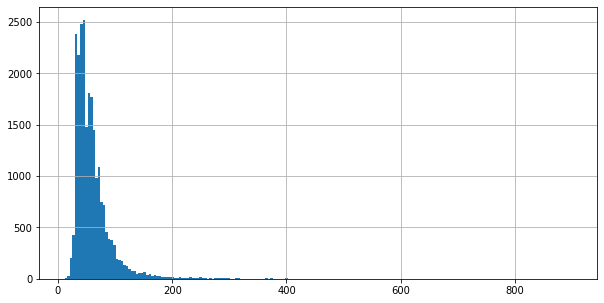

In [116]:
apartments['total_area'].hist(bins=200, figsize=(10, 5))

Диаграмма похожа на нормальное распределение. Но все портит длинный хвост, который растягиватся до 900 кв.в. Удалим его, что бы от не отражался на рассчетах.

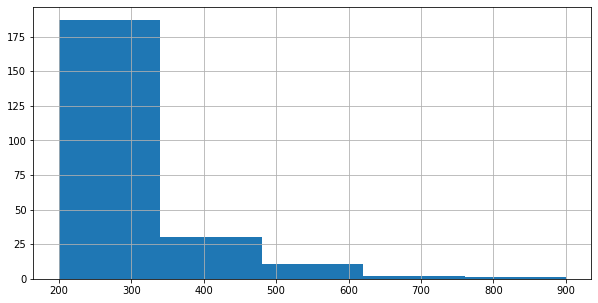

In [117]:
apartments['total_area'].hist(bins=5, range = (200, 900), figsize=(10, 5))

Действительно после 400 количество квартир резко падает. Посмотрим сколько их остается. И удаляем.

In [118]:
len(apartments.query('total_area >= 400'))

26

In [119]:
apartments = apartments[apartments["total_area"] < 400].reset_index(drop=True)

(0, 400)

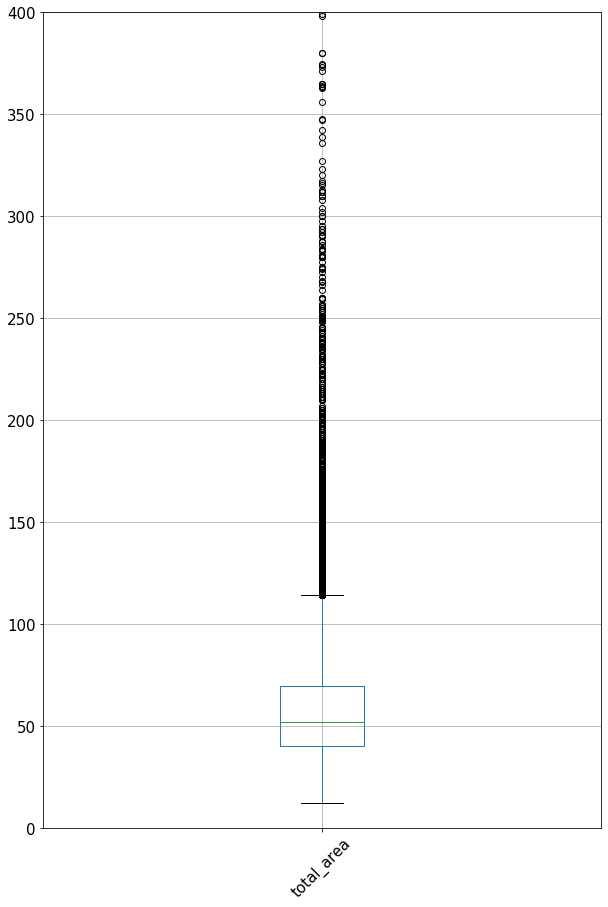

In [120]:
apartments.boxplot(['total_area'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 400)
#plt.xlim(-100, 200)

Из диаграммы видно, что выбросы начинаются после 110 кв.м.

#### Жидая площадь  - living_area

До того как строить графики, рассмотрим числовое описание данных в столбце "living_area"

In [121]:
print(apartments["living_area"].describe())

count   23,612.0
mean        34.2
std         20.6
min          9.0
25%         18.4
50%         30.3
75%         42.6
max        264.5
Name: living_area, dtype: float64


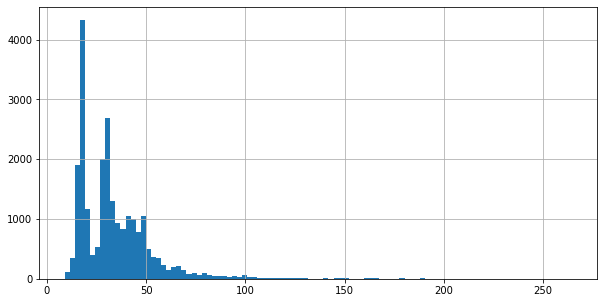

In [122]:
apartments['living_area'].hist(bins=100, figsize=(10, 5))

Диаграмма похожа на нормальное распределение но на участе от 15 до 60 кв. метров видно два максимума. Наиболее частая общая жилая площадь исследуемых квартир = 18-42 кв.м. Удалим хвост, который больше 200 кв.м.

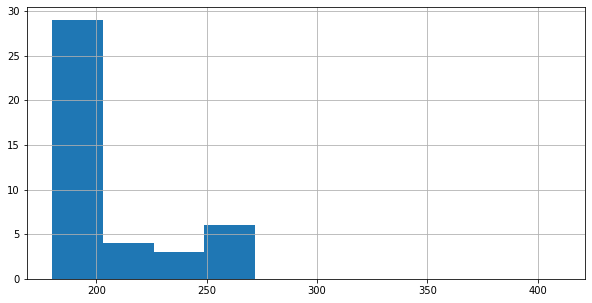

In [123]:
apartments['living_area'].hist(bins=10, range = (180, 410), figsize=(10, 5))

Действительно после 200 количество квартир резко падает. Посмотрим сколько их остается. И удаляем.

In [124]:
len(apartments.query('living_area >= 200'))

15

In [125]:
apartments = apartments[apartments["living_area"] < 200].reset_index(drop=True)

 Теперь посморим на участок с двумя максимумами более пристально.

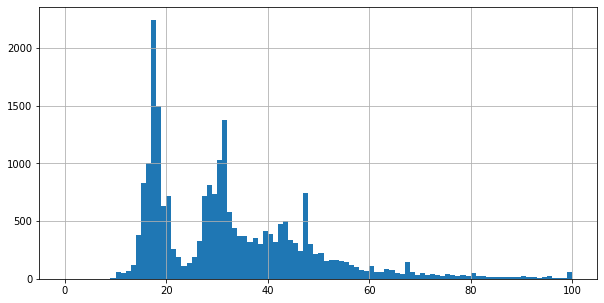

In [126]:
apartments['living_area'].hist(bins=100, range=(0, 100), figsize=(10, 5))

Мы видим три максимум 12 -23, 24 - 35 и 40 - 50. По видимому это соотвествует наиболее частым площадям 1, 2 и 3 комнатных скартир.

 Построим диаграмму размаха и определим выбросы.

(0, 200)

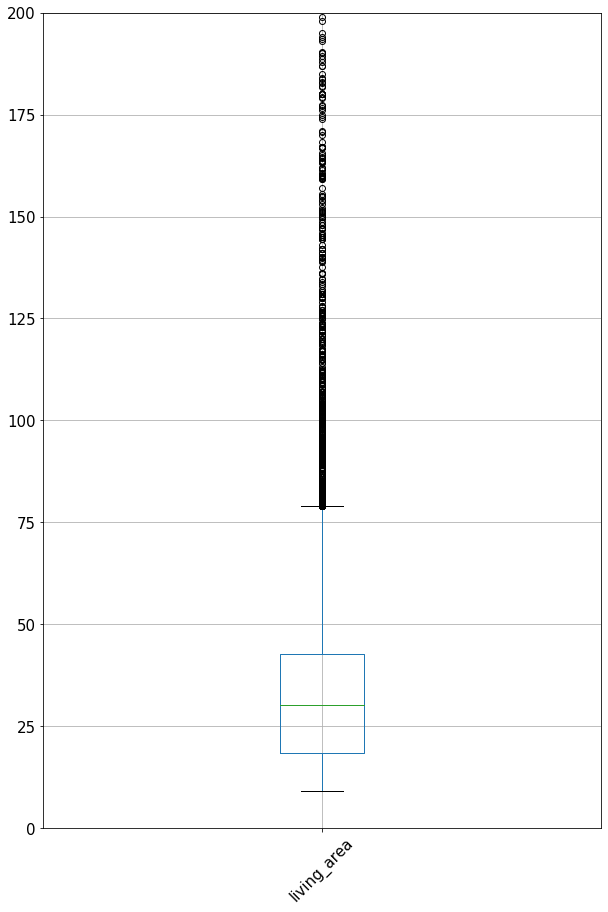

In [127]:
apartments.boxplot(column=['living_area'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 200)
#plt.xlim(-100, 200)

выбросы начинаются на уровне 77 м.кв.

#### Цена - last_price

До того как строить графики, рассмотрим числовое описание данных в столбце "last_price"

In [128]:
print(apartments["last_price"].describe())

count        23,597.0
mean      6,350,477.0
std       7,989,537.1
min          12,190.0
25%       3,400,000.0
50%       4,630,000.0
75%       6,750,000.0
max     330,000,000.0
Name: last_price, dtype: float64


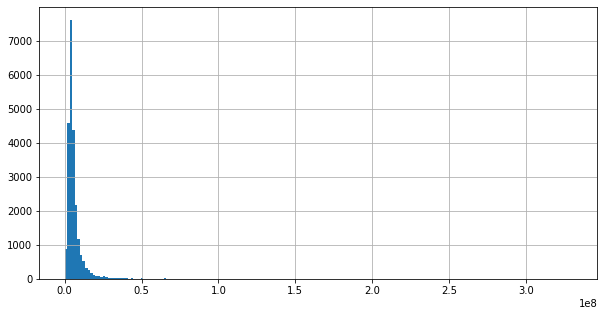

In [129]:
apartments['last_price'].hist(bins=200, figsize=(10, 5))

Диаграмма похожа на нормальное распределение. Но все портит длинный хвост, который растягиватся до 7.630000e+08. Наиболее частая цена исследуемых квартир = 3,4 - 7,6 млн. Удалим хвост.

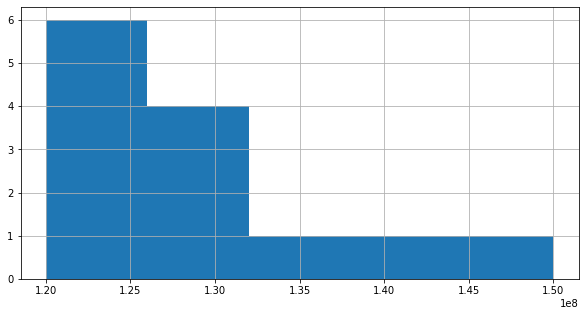

In [130]:
apartments['last_price'].hist(bins=5, range = (120000000, 150000000), figsize=(10, 5))

Действительно после 130 млн количество квартир резко падает. Посмотрим сколько их остается. И удаляем.

In [131]:
len(apartments.query('last_price >= 130000000'))

15

In [132]:
apartments = apartments[apartments["last_price"] < 130000000].reset_index(drop=True)

Посмотрим на начальный интервал более пристально.

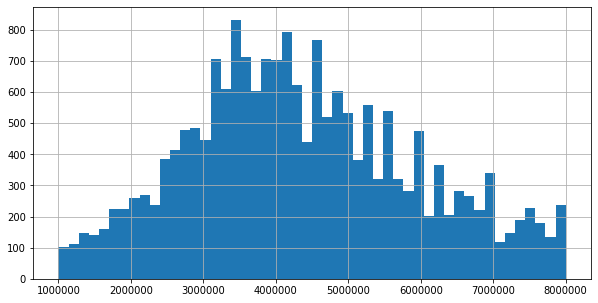

In [133]:
apartments['last_price'].hist(bins=50, range=(1e+06, 8e+06), figsize=(10, 5))

Классическое нормаьное распределение. Построим диаграмму размаха и определим выбросы.

(0, 130000000)

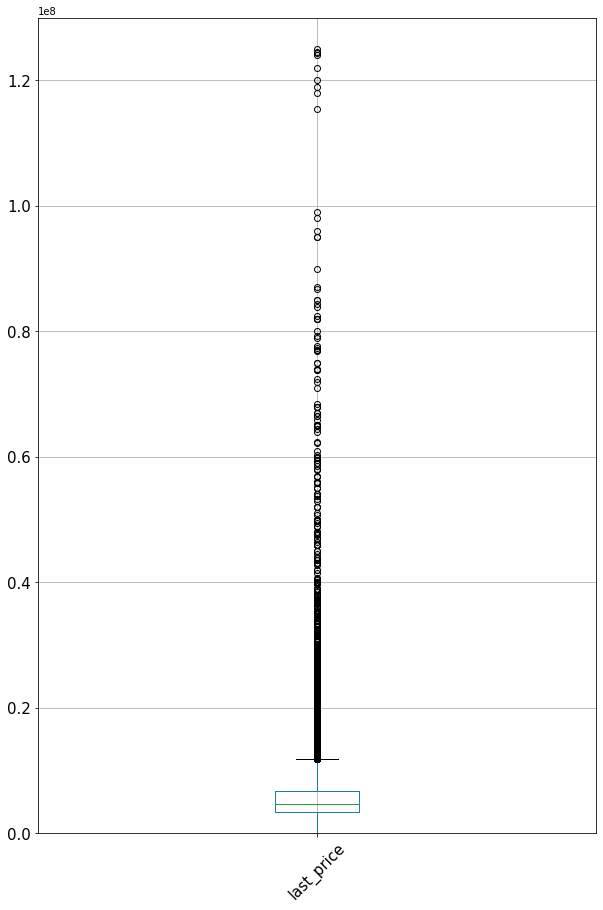

In [134]:
apartments.boxplot(column=['last_price'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 130000000)
#plt.xlim(-100, 200)

Из диаграммы видно, что выбросы начинаются после 12 млн

#### Количесво комнат - rooms

До того как строить графики, рассмотрим числовое описание данных в столбце "rooms"

In [135]:
print(apartments["rooms"].describe())

count   23,582.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         16.0
Name: rooms, dtype: float64


В глаза бросаются 0 комнат. Посмотрим, что это за квартиры и сколько их.

In [136]:
apartments[apartments['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter,weekday,month,year,type_floor,relation_living_total,relation_kitchen_total
144,1,"2,450,000.0",27.0,2017-03-30,0,2.6,24,15.5,2,NaN,True,False,nan,2.0,Мурино,nan,12868,nan,nan,nan,nan,181.0,90740,3,March,2017,Другой,0.6,nan
348,4,"2,320,000.0",25.0,2017-09-27,0,2.6,14,17.0,1,NaN,False,True,nan,0.0,Кудрово,nan,16843,nan,nan,nan,nan,45.0,92800,2,September,2017,Первый,0.7,nan
439,8,"2,480,000.0",27.1,2018-03-12,0,2.7,17,24.8,4,NaN,True,False,nan,2.0,Санкт-Петербург,"38,171.0",15015,0.0,nan,2.0,982.0,64.0,91512,0,March,2018,Другой,0.9,nan
507,0,"3,375,000.0",34.4,2017-03-28,0,2.9,26,24.3,19,NaN,False,True,nan,1.0,Парголово,"53,115.0",19292,0.0,nan,1.0,593.0,430.0,98110,1,March,2017,Другой,0.7,nan
607,2,"1,850,000.0",25.0,2019-02-20,0,2.7,10,19.0,7,NaN,True,False,nan,nan,Шушары,nan,12961,nan,nan,nan,nan,29.0,74000,2,February,2019,Другой,0.8,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23094,7,"3,200,000.0",26.0,2017-09-01,0,2.6,25,18.0,16,NaN,True,False,nan,0.0,Санкт-Петербург,"11,405.0",13222,0.0,nan,1.0,623.0,14.0,123076,4,September,2017,Другой,0.7,nan
23325,0,"2,500,000.0",27.7,2017-09-28,0,2.6,24,18.0,4,NaN,False,True,nan,2.0,Мурино,nan,16352,nan,nan,nan,nan,4.0,90252,3,September,2017,Другой,0.6,nan
23437,15,"3,350,000.0",26.0,2018-09-07,0,2.7,19,19.0,8,NaN,True,False,nan,nan,Санкт-Петербург,"18,090.0",17092,0.0,nan,2.0,112.0,31.0,128846,4,September,2018,Другой,0.7,nan
23475,10,"1,450,000.0",29.0,2017-11-11,0,2.6,9,18.0,8,NaN,False,True,nan,2.0,Никольское,nan,18188,nan,nan,nan,nan,82.0,50000,5,November,2017,Другой,0.6,nan


Видим, что это студии и свободные планировки без кухонь. Поэтому там нетжилых комнат, в классическом понимании. Но на самом деле они есть. Заменим из на 0,5, чтобы можно было отличить.

In [137]:
apartments['rooms'].replace(apartments[apartments["rooms"] == 0]["rooms"], 0.5, inplace = True)

Рассмотрим числовое описание данных в столбце "rooms" еще раз.

In [138]:
print(apartments["rooms"].describe())

count   23,582.0
mean         2.1
std          1.0
min          0.5
25%          1.0
50%          2.0
75%          3.0
max         16.0
Name: rooms, dtype: float64


Теперь Ок!

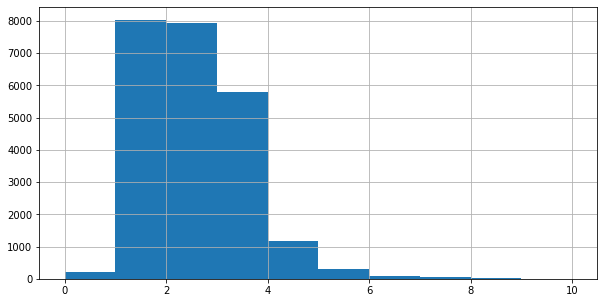

In [139]:
apartments['rooms'].hist(bins=10, range=(0, 10), figsize=(10, 5))

Диаграмма похожа на нормальное распределение. Но все портит длинный хвост, который растягиватся до 10 комнат. Наиболее частое количество комнат в исследуемых квартирах = 1 - 3. Удалим хвост.

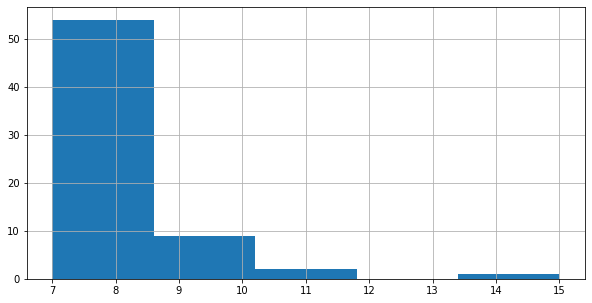

In [140]:
apartments['rooms'].hist(bins=5, range = (7, 15), figsize=(10, 5))

Действительно после 9 комнат количество квартир резко падает. Посмотрим сколько их остается. И удаляем.

In [141]:
len(apartments.query("rooms >= 9"))

13

In [142]:
apartments = apartments[apartments["rooms"] < 9].reset_index(drop=True)

Построим диаграмму размаха и определим выбросы. 

(0, 19)

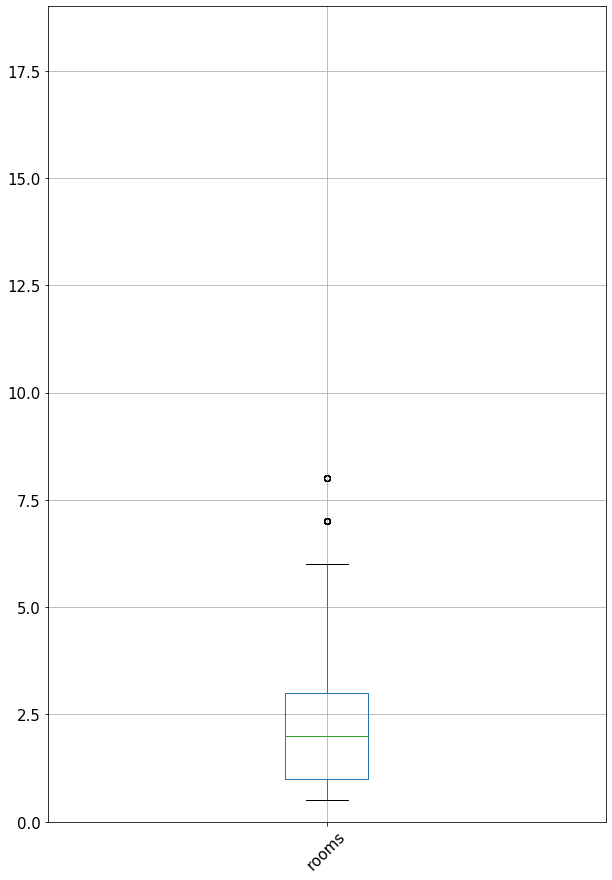

In [143]:
apartments.boxplot(column=['rooms'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 19)
#plt.xlim(-100, 200)

Из диаграммы видно, что выбросы начинаются после 6 комант.

#### Выоста потолков - ceiling_height

До того как строить графики, рассмотрим числовое описание данных в столбце "ceiling_height"

In [144]:
print(apartments["ceiling_height"].describe())

count   23,569.0
mean         2.7
std          0.2
min          2.0
25%          2.6
50%          2.7
75%          2.8
max          6.0
Name: ceiling_height, dtype: float64


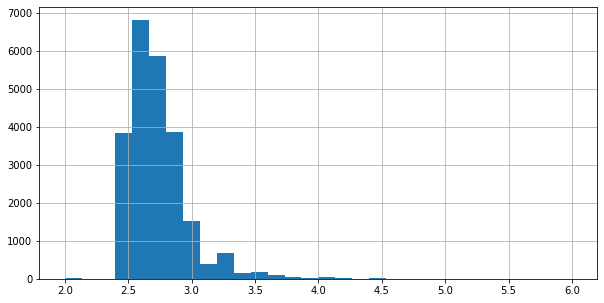

In [145]:
apartments['ceiling_height'].hist(bins=30, figsize=(10, 5))

Диаграмма похожа на нормальное распределение. Но все портит длинный хвост, который растягиватся до 6 м. Наиболее частая высота потолков исследуемых квартир = 2,6 - 2,8 м. Удалим хвост.

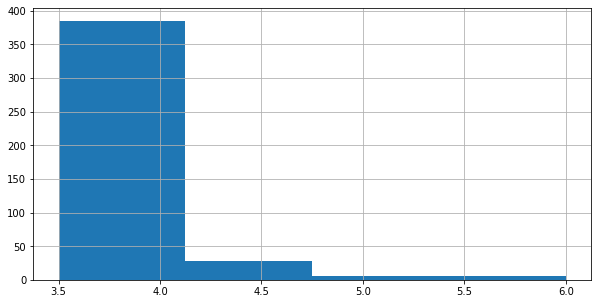

In [146]:
apartments['ceiling_height'].hist (bins=4, range = (3.5, 6), figsize=(10, 5))

Действительно после 130 млн количество квартир резко падает. Посмотрим сколько их остается. И удаляем.

In [147]:
len(apartments.query('ceiling_height >= 4.5'))

19

In [148]:
apartments = apartments[apartments["ceiling_height"] < 4.5].reset_index(drop=True)

 Построим диаграмму размаха и определим выбросы.

(0, 4.55)

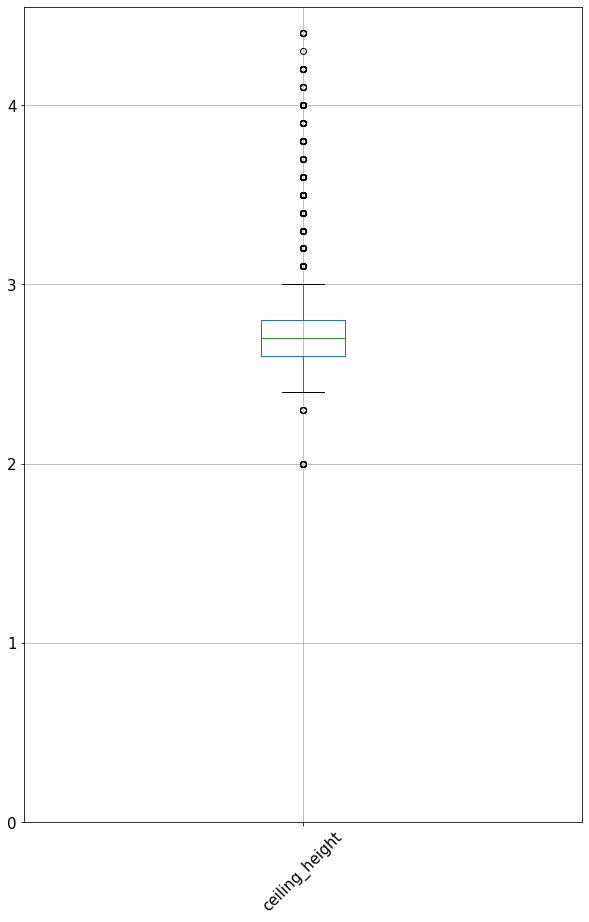

In [149]:
apartments.boxplot(column=['ceiling_height'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 4.55)
#plt.xlim(-100, 200)

Из диаграммы видно, что выбросы находятся в диапазонах < 2,5 и > 3 м.

### Задачи блока "Время продажи квартир"
#### * Изучим время продажи квартир и построим гистограмму
#### * Посчитаем среднее и медиану
#### * Опишем, сколько обычно занимает продажа
#### * Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго

#### Изучим время продажи квартир - days_exposition

До того как строить графики, рассмотрим числовое описание данных в столбце "days_exposition"

In [150]:
print(apartments["days_exposition"].describe())

count   20,392.0
mean       180.4
std        219.4
min          1.0
25%         45.0
50%         95.0
75%        231.0
max      1,580.0
Name: days_exposition, dtype: float64


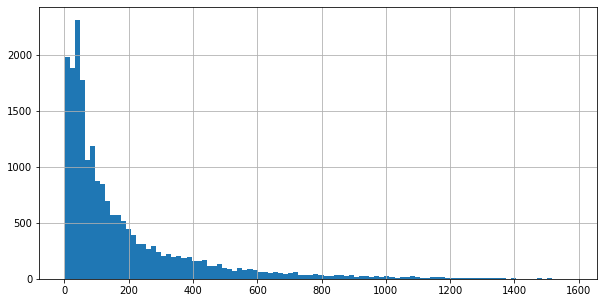

In [151]:
apartments['days_exposition'].hist(bins=100, figsize=(10, 5))

Диаграмма похожа на распределение Пуассона.

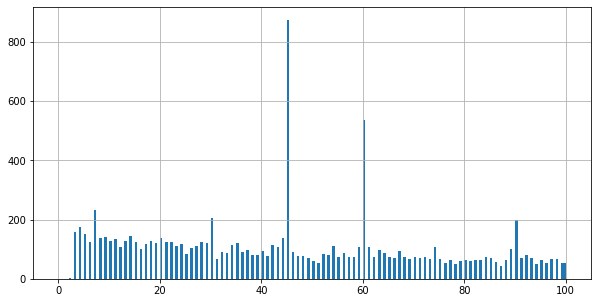

In [152]:
apartments['days_exposition'].hist(bins=200, range = (0, 100), figsize=(10, 5))

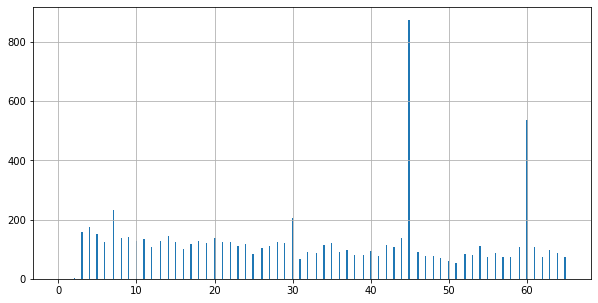

In [153]:
apartments['days_exposition'].hist(bins=400, range = (0, 65), figsize=(10, 5))

Видим резкое точечное увеличение количества прдаваемых кватрир соотвесвующее примерно 45, 60 и 90 дням. Можно предположить, что это те дни, когда оформляются сделки по продаже недвижимости застройщиками на первичном рынке. Но что вероятнее всего - это по определенным причинам снимаются объявления о продаже недвижимости

 Построим диаграмму размаха и определим выбросы.

(0, 1600)

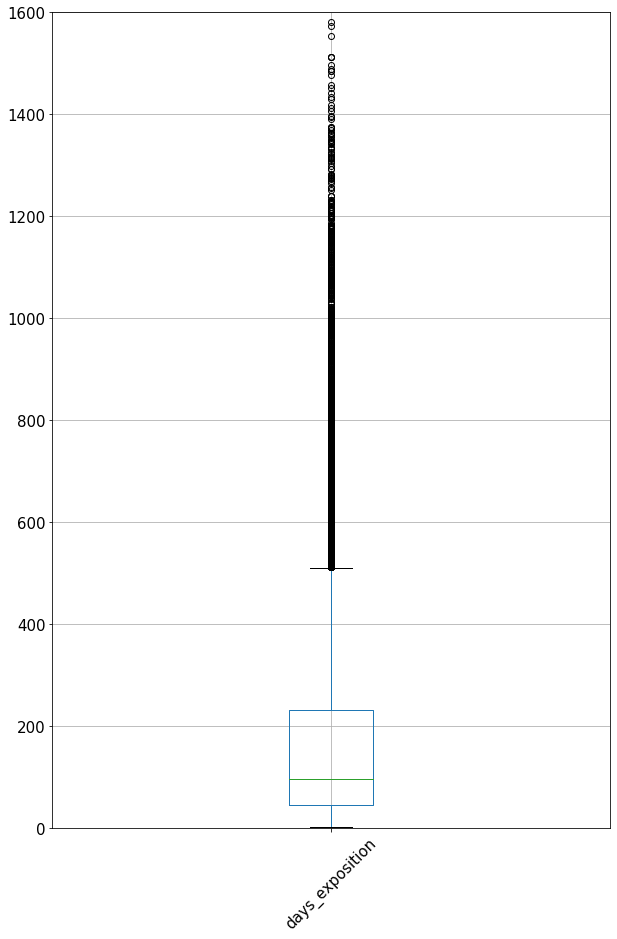

In [154]:
apartments.boxplot(column=['days_exposition'], rot=45, fontsize=15, figsize=(10, 15))
plt.ylim(0, 1600)

Из диаграммы видно, что выбросы находятся в диапазонах > 500 дней.

#### Посчитаем среднее и медиану, опишем, сколько обычно занимает продажа

Из числового описания данных и диаграммы размаха видим, что среднее время продажи квартир составляет 180 дней, а медиана равна 95 дням. За период 45 дней продается 24,65% квартир, за период от 45 до 231 дня (1,5 - 7,5 месяцев) продается еще 50% квартир. И оставшяяся квартиры распродаются в среднем до 500 дней (1,4 года), не считая выбрасов - 0,35%.

#### Определим, когда можно считать, что продажи прошли очень быстро, а когда необычно долго

График после 1200 дней сливается с 0. Посмотрим на этот интервал более пристально.

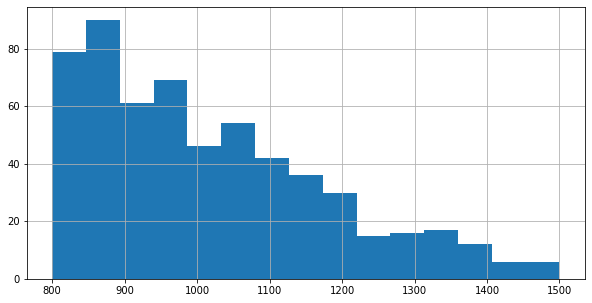

In [155]:
apartments['days_exposition'].hist(bins=15, range = (800, 1500), figsize=(10, 5))

Посмотрим, сколько квартир продаются дольше 1200 дней.

In [156]:
len(apartments.query('days_exposition > 1250'))

67

67 - это всего 0,3% квартир. Примем верхнюю границу в 1250 дней. Это число кажется разумным: дольше продается очень мало квартир. И скорее всего это просто люди забывают снять объявления с продаж. Отбросив значения больше 1250, мы не потеряем много данных.

In [157]:
apartments = apartments[apartments["days_exposition"] < 1250].reset_index(drop=True)

Теперь посмотрим, что значит продажи прошли очень быстро. Глянем на начальный интервал гистограммы.

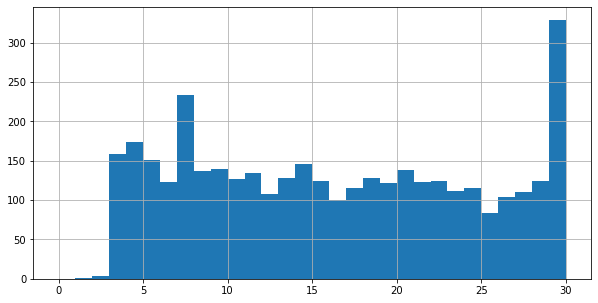

In [158]:
apartments['days_exposition'].hist(bins=30, range = (0, 30), figsize=(10, 5))

Из диаграммы видно, что первые два дня продаж было очень мало. Проверим сколько точно.

In [159]:
len(apartments.query('days_exposition <=2'))

4

Да, всего 4 продажи в првые 2 дня экспозиции объявления. Скоорее всего это просто человек зачем-то разместил объявление и потом убрал. Например тестировал сервис.

### Задачи блока "Стоимость квартиры"
#### * Какие факторы больше всего влияют на стоимость квартиры? 
#### * Изучите, зависит ли цена от квадратного метра (площади), числа комнат, удалённости от центра. 
#### * Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
#### *Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Определение факторов, которые больше всего влияют на стоимость квартиры

Определить какие факторы больше всего влияют на стоимость квартиры можно с помощью кореляции. Посмотри, с какими показателями больше всего коррелиует стоимость квартиры.

In [160]:
print((apartments.corr()["last_price"]).sort_values(ascending = False))

last_price                1.0
price_squ_meter           0.7
total_area                0.7
living_area               0.6
kitchen_area              0.6
ceiling_height            0.4
rooms                     0.4
ponds_around3000          0.2
parks_around3000          0.2
total_images              0.1
days_exposition           0.1
balcony                   0.0
floor                     0.0
floors_total              0.0
weekday                   0.0
parks_nearest             0.0
open_plan                -0.0
airports_nearest         -0.0
studio                   -0.0
relation_living_total    -0.0
year                     -0.1
relation_kitchen_total   -0.1
ponds_nearest            -0.1
cityCenters_nearest      -0.3
Name: last_price, dtype: float64


Видим, что стоимость квартиры больше всего коррелирует со следующими показателями:
* price_squ_meter           0.740010
* total_area                0.734970
* living_area               0.610324
* kitchen_area              0.570765
* ceiling_height            0.442763
* rooms                     0.441942
* cityCenters_nearest      -0.294119

С первыми 6 показателями имеется положительная корреляция, с расстоянием до центра - отрицательная.

####  Изучение зависимости цены от квадратного метра (площади)

Общая площадь, жилая площадь и площадь кухни - это три параметра, от которых больше всего зависит цена квартиры. Рассмотрим показатель общая площадь. Для более пристального рассмотрения воспользуемся диаграммой рассеяния.

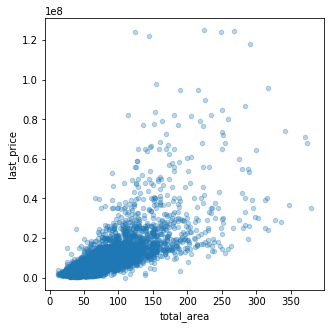

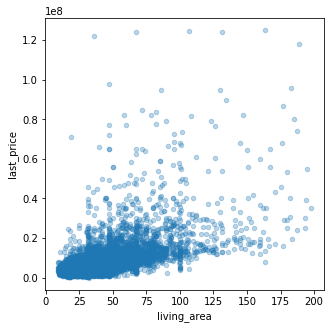

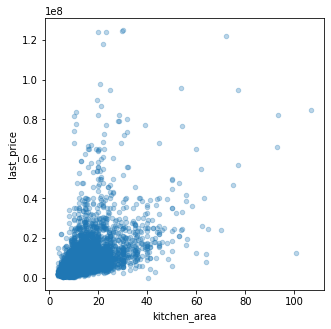

In [161]:
apartments.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))
apartments.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))
apartments.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))

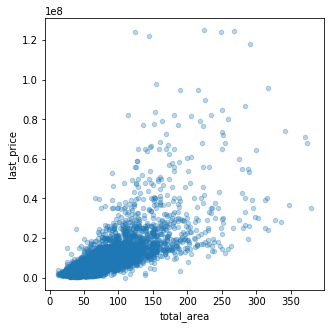

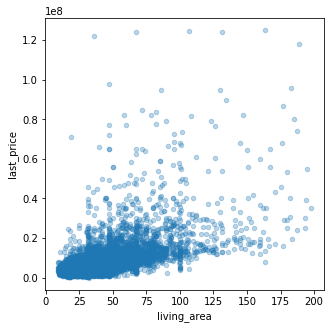

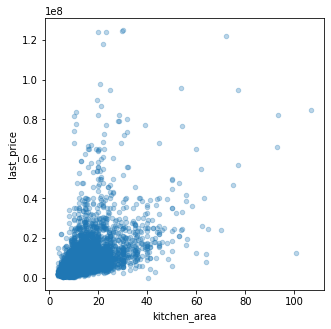

In [162]:
for area in ('total_area', 'living_area', 'kitchen_area'):
    apartments.plot(x=area, y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))

В интервале от 12 кв.м. до 100 цена и площадь тесно связаны, затем зависимость перестаёт быть устойчивой. Мне кажется, что до этой площади квартиры сильно похожи друг на друга и поэтому площадь - важнейщий фактор. После 100 квадратов на стоимость сильно начинают влиять прочие факторы - район застройки, удаленность от центра и т.п. Зависимость цены от жилой площади и площади кухни имеет аналогичный характер.

Построим график, поделенный на шестиуголные области.

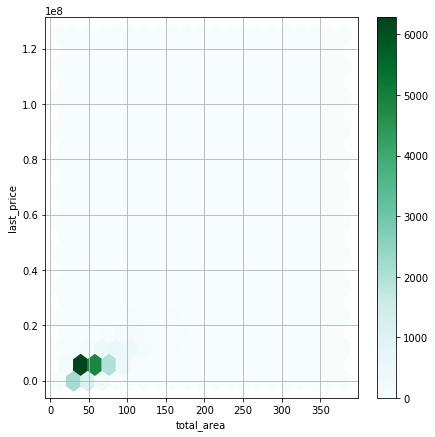

In [163]:
apartments.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(7, 7), sharex=False, grid=True)

Мы видим, что имнно на этом интервале площадей кучненько сосредоточна основная масса квартир.

####  Изучение зависимости цены от числа комнат

Исследуем с помощью диаграммы рассеяния и графика зависимость цены от числа комнат.

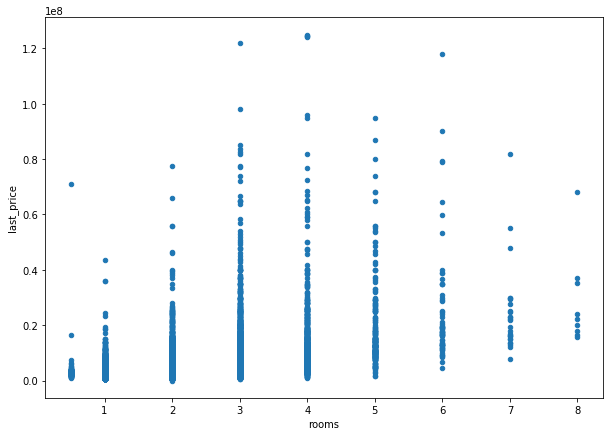

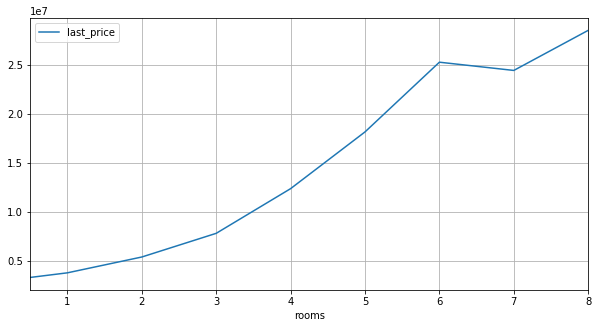

In [164]:
apartments.plot(x='rooms', y='last_price', kind='scatter', figsize=(10, 7))
apartments.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(grid=True, figsize=(10, 5))

В интервале от студий до 4-х комнатных квартир начало ценового диапазона одинаково для каждой группы квартир, а его окончание стремительно растет. Начиная с 5-ти комнатных квартир начало ценовго диапазон в каждой группе квартир стремительно увеличивается с увеличением количесвтва комнат, а его окончание снижается - диапазон становиться более узким. Средние значения непрерывно увеличиваются от студий до шестикомнатных квартир, причем приращение функции возрастает постоянно вплоть до 6-ти комнатных квартир. Далее идет небольшое падение и медленный рост.  

####  Изучение зависимости цены от удалённости от центра

Исследуем с помощью диаграммы рассеяния зависимость цены от удалённости от центра.

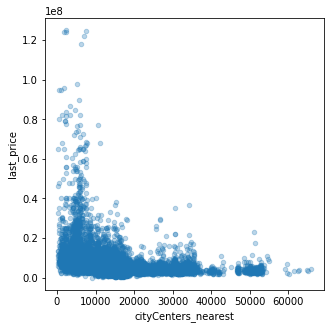

In [165]:
apartments.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))

Вид диаграммы, напоминающий гиперболу подтверждает обратн-пропорциональный тип зависимости цены от расстояния от центра. ОТчетливо выделяется некий интервал от 0 до 5 км, в котором сосредоточены самые дорогие квартиры и далее при удалении от центра цена на падает.

#### Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Исследуем с помощью диаграммы рассеяния и графика зависимость цены от от того, на каком этаже расположена квартира: первом, последнем или другом. Для этого сначала замним словесные названия типов этажей на числовые 1 - первый этаж, 2 - другие этажи, 3 - последний этаж.

In [166]:
apartments["type_floor"] = 2
apartments["type_floor"].replace(apartments.query("floor == floors_total")["type_floor"], 3, inplace = True)
apartments["type_floor"].replace(apartments.query("floor == 1")["type_floor"], 1, inplace = True)

Теперь мы можем построить диаграмму рассеяния.

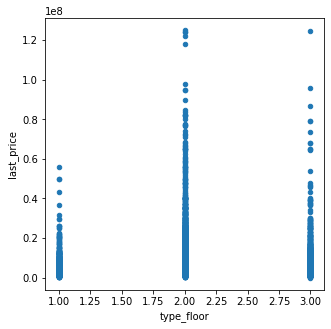

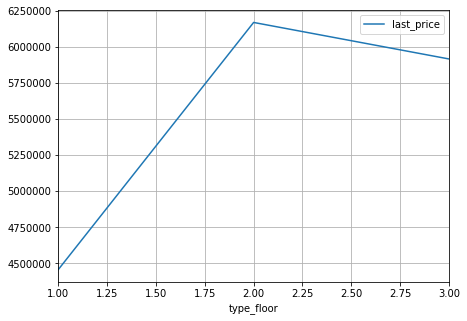

In [167]:
apartments.plot(x='type_floor', y='last_price', kind='scatter', alpha=1, figsize=(5, 5))
apartments.pivot_table(index='type_floor', values='last_price', aggfunc='mean').plot(grid=True, figsize=(7, 5))

Построим график, поделенный на шестиуголные области.

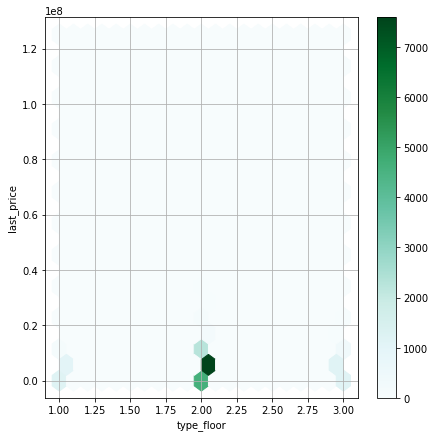

In [168]:
apartments.plot(x='type_floor', y='last_price', kind='hexbin', gridsize=20, figsize=(7, 7), sharex=False, grid=True)

Эти три дианграммы наглядно показывают, что есть зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Самые дешевые квартиры находятся на 1 этаже, наибльшее количество дорогих квартир находится на "других этажах", последний этаж занимает провежуточное положение.

#### Изучение зависимости цены от даты размещения: дня недели, месяца и года

Сначало переведем месяц в числовой формат

In [169]:
apartments['month'] = apartments["first_day_exposition"].dt.month

Теперь мы можем построить диаграмму рассеяния и график

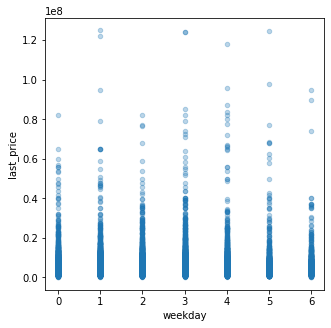

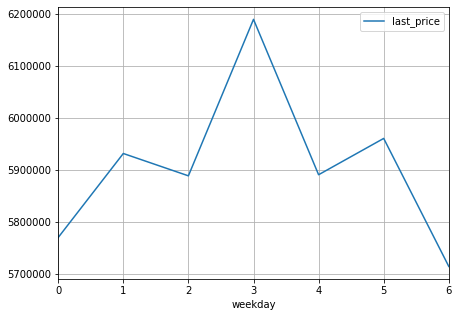

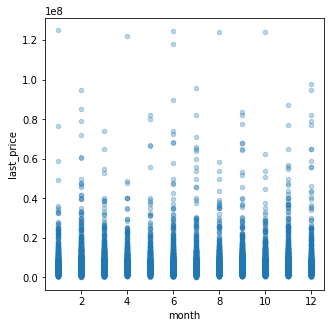

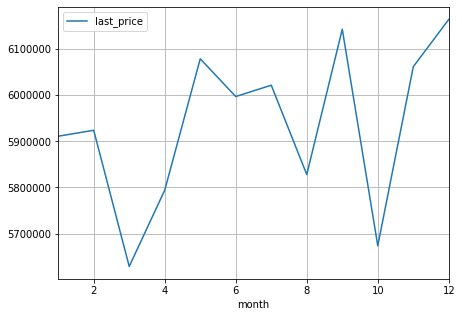

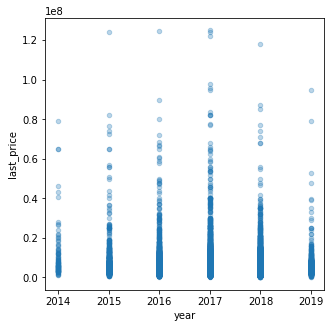

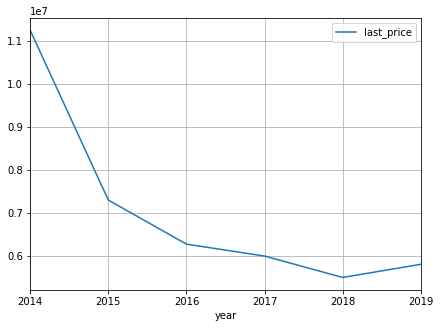

In [170]:
apartments.plot(x='weekday', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))
apartments.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(grid=True, figsize=(7, 5))
apartments.plot(x='month', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))
apartments.pivot_table(index='month', values='last_price', aggfunc='mean').plot(grid=True, figsize=(7, 5))
apartments.plot(x='year', y='last_price', kind='scatter', alpha=0.3, figsize=(5, 5))
apartments.pivot_table(index='year', values='last_price', aggfunc='mean').plot(grid=True, figsize=(7, 5))

Эти диаграммы наглядно показывают, что есть зависимость цены от:
* дня недели  - самые дешевые квартиры продаются в понедельник и воскресенье, самые дорогие в четверг
* месяца - самые дешевые квартиры продаются в марте и октябре, самые дорогие в сентябре и декабре
* года - среднепродажные цены на квартиры стремительно падали с 2014 до 2018 года. В 2019 наметилась положительная динамика. По видимому это связано в основном с тем, что стало меньше сделок с особо дорогой недвижимостью.

### Задачи блока "10 населенных пунктов"

Определим 10 населённых пунктов с наибольшим числом объявлений

In [171]:
apartments["locality_name"].value_counts().reset_index()[0:10]

,index,locality_name
0,Санкт-Петербург,13524
1,Мурино,550
2,Кудрово,439
3,Шушары,408
4,Всеволожск,338
5,Колпино,308
6,Пушкин,303
7,Парголово,301
8,Гатчина,268
9,Выборг,207


Определим среднюю цену квадратного метра во всех населённых пунктах

In [172]:
apartments.pivot_table(index='locality_name', values='price_squ_meter', aggfunc='mean').reset_index()

,locality_name,price_squ_meter
0,Агалатово,"69,715.3"
1,Александровская,"70,262.5"
2,Алексеевка,"22,222.0"
3,Аннино,"62,793.9"
4,Аро,"49,139.0"
...,...,...
277,"имени', 'Свердлова","59,778.5"
278,"садоводческое', 'Поляна', 'товарищество', 'нек...","22,580.0"
279,"товарищество', 'садовое', 'Приладожский","44,166.0"
280,"товарищество', 'садовое', 'Рахья","37,777.0"


Посчитайте среднюю цену квадратного метра в ТОП 10 населённых пунктов

In [173]:
a = apartments["locality_name"].value_counts()[0:10].reset_index()

In [174]:
a.columns = ['locality_name', 'count']

In [175]:
b = apartments.pivot_table(index='locality_name', values='price_squ_meter', aggfunc='mean').reset_index()

In [176]:
a.merge(b, on='locality_name').sort_values(by = "price_squ_meter", ascending=False)

,locality_name,count,price_squ_meter
0,Санкт-Петербург,13524,"111,273.9"
6,Пушкин,303,"102,060.0"
2,Кудрово,439,"94,455.0"
7,Парголово,301,"89,424.7"
1,Мурино,550,"85,735.5"
3,Шушары,408,"78,010.0"
5,Колпино,308,"74,864.7"
4,Всеволожск,338,"68,589.8"
8,Гатчина,268,"67,927.8"
9,Выборг,207,"57,024.3"


Выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [177]:
apartments.pivot_table(index='locality_name', values='price_squ_meter', aggfunc='mean').sort_values("price_squ_meter", ascending=False).reset_index()

,locality_name,price_squ_meter
0,"Нос', 'Лисий","113,728.0"
1,Зеленогорск,"111,332.0"
2,Санкт-Петербург,"111,273.9"
3,Пушкин,"102,060.0"
4,Сестрорецк,"101,449.1"
...,...,...
277,Совхозный,"12,628.5"
278,Выскатка,"12,335.0"
279,"Кара', 'Вахнова","11,688.0"
280,Свирь,"11,481.0"


### Задачи блока "Центр Питера"

#### Выделим квартиры в Санкт-Петербурге ('locality_name')

In [178]:
apartments.query('locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squ_meter,weekday,month,year,type_floor,relation_living_total,relation_kitchen_total
1,10,"5,196,000.0",56.0,2015-08-20,2.0,2.8,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0",13933,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,2,0.6,0.1
2,0,"64,900,000.0",159.0,2015-07-24,3.0,2.7,14,47.4,9,NaN,False,False,16.1,0.0,Санкт-Петербург,"28,098.0",6800,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,2,0.3,0.1
3,2,"10,000,000.0",100.0,2018-06-19,2.0,3.0,14,32.0,13,NaN,False,False,41.0,nan,Санкт-Петербург,"31,856.0",8098,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,2,0.3,0.4
7,18,"5,400,000.0",61.0,2017-02-26,3.0,2.5,9,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,"50,898.0",15008,0.0,nan,0.0,nan,289.0,88524,6,2,2017,2,0.7,0.1
8,5,"5,050,000.0",39.6,2017-11-16,1.0,2.7,12,20.3,3,NaN,False,False,8.5,nan,Санкт-Петербург,"38,357.0",13878,1.0,310.0,2.0,553.0,137.0,127525,3,11,2017,2,0.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,19,"9,200,000.0",101.0,2019-04-01,3.0,3.0,15,63.0,12,NaN,False,False,15.0,nan,Санкт-Петербург,"15,632.0",14428,0.0,nan,0.0,nan,23.0,91089,0,4,2019,2,0.6,0.1
20318,13,"3,550,000.0",35.3,2018-02-28,1.0,2.9,15,16.3,4,NaN,False,False,9.1,2.0,Санкт-Петербург,"17,284.0",16081,1.0,353.0,2.0,652.0,29.0,100566,2,2,2018,2,0.5,0.3
20319,3,"5,500,000.0",52.0,2018-07-19,2.0,2.7,5,31.0,2,NaN,False,False,6.0,nan,Санкт-Петербург,"20,151.0",6263,1.0,300.0,0.0,nan,15.0,105769,3,7,2018,2,0.6,0.1
20320,11,"9,470,000.0",72.9,2016-10-13,2.0,2.8,25,40.3,7,NaN,False,False,10.6,1.0,Санкт-Петербург,"19,424.0",4489,0.0,nan,1.0,806.0,519.0,129903,3,10,2016,2,0.6,0.1


#### Создадим столбец с расстоянием до центра в километрах: округлиим до целых значений

In [179]:
apartments["cityCenters_nearest_km"] = (apartments["cityCenters_nearest"] / 1000).astype("int")

#### Посчитаем среднюю цену для каждого километра

In [180]:
apartments.pivot_table(index='cityCenters_nearest_km', values='price_squ_meter', aggfunc='mean').reset_index()

,cityCenters_nearest_km,price_squ_meter
0,0,"158,005.0"
1,1,"142,350.7"
2,2,"137,614.7"
3,3,"118,677.0"
4,4,"134,653.4"
5,5,"138,857.7"
6,6,"138,680.8"
7,7,"136,772.8"
8,8,"116,402.4"
9,9,"106,253.6"


#### Постром график: он должен показывать, как цена зависит от удалённости от центра

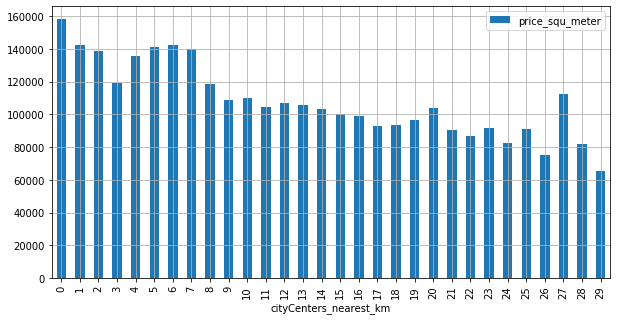

In [181]:
apartments.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_squ_meter', aggfunc='mean').plot(grid=True, kind = "bar", figsize=(10, 5))

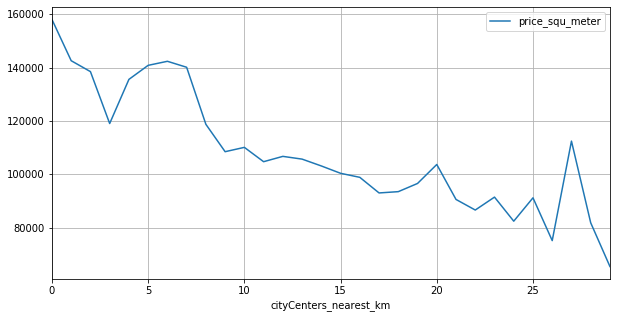

In [182]:
apartments.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_squ_meter', aggfunc='mean').plot(grid=True, figsize=(10, 5))

Граница, где график сильно меняется и уплощается  - 9 км от центра. Это и будет граница центральной зоны в Санкт - Петербурге.

### Сравнение квартир из сегмента  "Центр Питера" с остальной зоной Питера по ряду критериев

#### Выделим сегмент квартир в центре и на окраине

In [183]:
center_St_Peter = apartments.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km < 9')

In [184]:
outskirts_St_Peter  = apartments.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km >= 9')

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

#### Общая площадь - total_area

До того как строить графики, рассмотрим числовое описание данных в столбце "total_area"

In [185]:
center_St_Peter["total_area"].describe().reset_index()
outskirts_St_Peter["total_area"].describe().reset_index()
center_St_Peter["total_area"].describe().reset_index().merge(outskirts_St_Peter["total_area"].describe().reset_index(), on='index')

,index,total_area_x,total_area_y
0,count,"3,599.0","9,925.0"
1,mean,81.9,54.1
2,std,44.4,22.7
3,min,12.0,13.0
4,25%,50.6,39.0
5,50%,72.0,48.3
6,75%,98.4,63.0
7,max,373.1,336.0


Выводы:
* Количестов продаваемых квартир в центре меньше в 3 раза
* Средняя площадь продаваемых квартир в центре больше на 50%
* Разброс по площади продаваемых квартир в центре больше в 2 раза (считается по std)

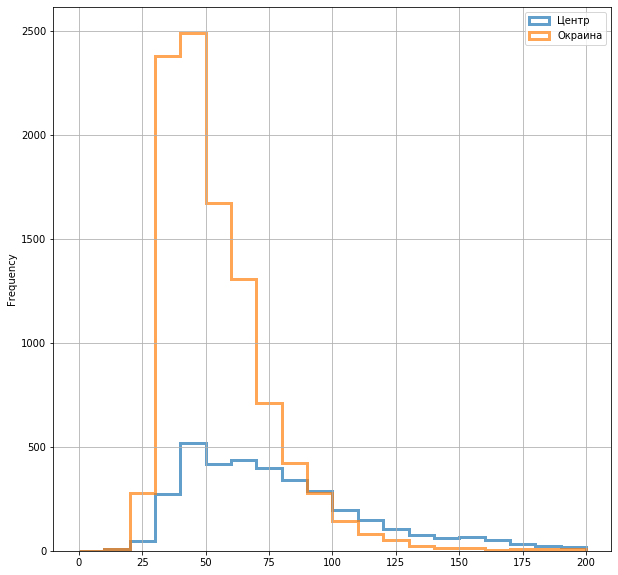

In [186]:
ax = center_St_Peter.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=20, linewidth=3, alpha=0.7, label='Центр')
outskirts_St_Peter.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=20, linewidth=3, alpha=0.7, label='Окраина', ax=ax, grid=True, legend=True, figsize=(10, 10))


Вывод: Квартир площадью до 80 кв.м. продается больше на окранине, а площадью  более 80 кв.м. - в центре

#### Цена - last_price

До того как строить графики, рассмотрим числовое описание данных в столбце "last_price"

In [187]:
center_St_Peter["last_price"].describe().reset_index()
outskirts_St_Peter["last_price"].describe().reset_index()
center_St_Peter["last_price"].describe().reset_index().merge(outskirts_St_Peter["last_price"].describe().reset_index(), on='index')

,index,last_price_x,last_price_y
0,count,"3,599.0","9,925.0"
1,mean,"11,524,128.7","5,578,332.7"
2,std,"11,467,579.5","3,064,293.5"
3,min,"1,600,000.0","12,190.0"
4,25%,"5,950,000.0","3,900,000.0"
5,50%,"8,290,000.0","4,755,962.0"
6,75%,"12,425,000.0","6,250,000.0"
7,max,"125,000,000.0","77,000,000.0"


Вывод: средняя цена в Центре больше в 2 раза

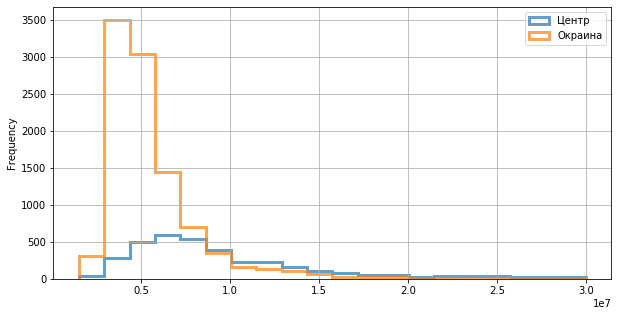

In [188]:
ax = center_St_Peter.plot(kind='hist', y='last_price', histtype='step', range=(1500000, 30000000), bins=20, linewidth=3, alpha=0.7, label='Центр')
outskirts_St_Peter.plot(kind='hist', y='last_price', histtype='step', range=(1500000, 30000000), bins=20, linewidth=3, alpha=0.7, label='Окраина', ax=ax, grid=True, legend=True, figsize=(10, 5))


Вывод: Количество продаваемых квартир стоимостью до 10 млн. больше на окраине. Квартир стоимостью более 10 млн больше продается в Центре.

#### Количесво комнат - rooms

До того как строить графики, рассмотрим числовое описание данных в столбце "rooms"

In [189]:
center_St_Peter["rooms"].describe().reset_index()
outskirts_St_Peter["rooms"].describe().reset_index()
center_St_Peter["rooms"].describe().reset_index().merge(outskirts_St_Peter["rooms"].describe().reset_index(), on='index')

,index,rooms_x,rooms_y
0,count,"3,599.0","9,925.0"
1,mean,2.6,1.9
2,std,1.2,0.9
3,min,0.5,0.5
4,25%,2.0,1.0
5,50%,2.0,2.0
6,75%,3.0,3.0
7,max,8.0,6.0


Вывод: Количество комнат в центре в среднем на 36% больше, чем на окраине.

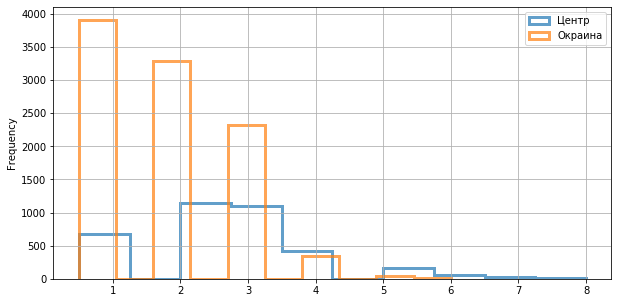

In [190]:
ax = center_St_Peter.plot(kind='hist', y='rooms', histtype='step', bins=10, linewidth=3, alpha=0.7, label='Центр')
outskirts_St_Peter.plot(kind='hist', y='rooms', histtype='step', bins=10, linewidth=3, alpha=0.7, label='Окраина', ax=ax, grid=True, legend=True, figsize=(10, 5))


Видим явное смещение в сторону увеличения среднего значения комнат в квартирах в центре. Также бросаетс в глаза, что квартиры с 5 комнатами и больше встречаются в основном в центре.

#### Выоста потолков - ceiling_height

До того как строить графики, рассмотрим числовое описание данных в столбце "ceiling_height"

In [191]:
center_St_Peter["ceiling_height"].describe().reset_index()
outskirts_St_Peter["ceiling_height"].describe().reset_index()
center_St_Peter["ceiling_height"].describe().reset_index().merge(outskirts_St_Peter["ceiling_height"].describe().reset_index(), on='index')

,index,ceiling_height_x,ceiling_height_y
0,count,"3,599.0","9,925.0"
1,mean,2.9,2.7
2,std,0.3,0.1
3,min,2.4,2.0
4,25%,2.7,2.6
5,50%,2.9,2.6
6,75%,3.1,2.7
7,max,4.4,4.2


Вывод: Средняя высота потолков в центре на 10% больше

,index,ceiling_height_x,ceiling_height_y
0,count,"3,599.0","9,925.0"
1,mean,2.9,2.7
2,std,0.3,0.1
3,min,2.4,2.0
4,25%,2.7,2.6
5,50%,2.9,2.6
6,75%,3.1,2.7
7,max,4.4,4.2


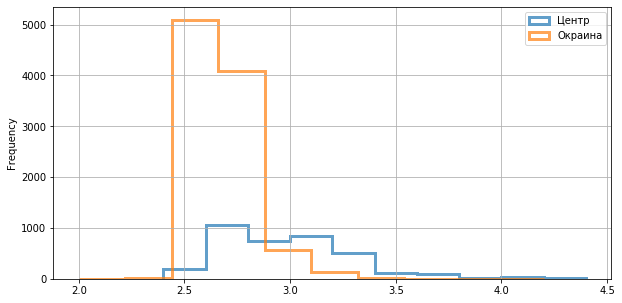

In [192]:
ax = center_St_Peter.plot(kind='hist', y='ceiling_height', histtype='step', bins=10, linewidth=3, alpha=0.7, label='Центр')
outskirts_St_Peter.plot(kind='hist', y='ceiling_height', histtype='step', bins=10, linewidth=3, alpha=0.7, label='Окраина', ax=ax, grid=True, legend=True, figsize=(10, 5))
center_St_Peter["ceiling_height"].describe().reset_index().merge(outskirts_St_Peter["ceiling_height"].describe().reset_index(), on='index')


На графике мы видим больше. Если средние величины смазывались в предыдущих расчетах, то здесь явно видно, что потолки выше 3 метров в центре встречаются гораздо чаще.

#### Изучим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

#### Зависимость стоимости квартиры от числа комнат

Построим графики зависимости стоимости квартиры от числа комнат в центре города и на периферии 

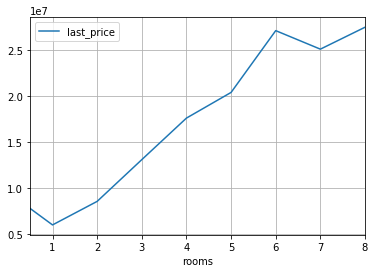

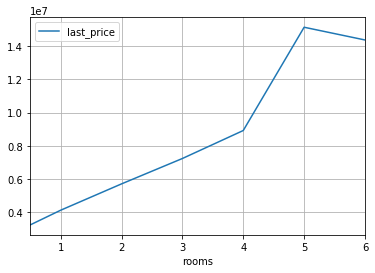

In [193]:
center_St_Peter.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Центр')

outskirts_St_Peter.pivot_table(index='rooms', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')
plt.show()

Вывод: Цена на квартиры в центре резко поднимается от 1-комнатных квартир до 6-ти комнатных. Затем, плато. На периферии города стомость поднимается более плавно до 4-х комнатныи и затем резко идет вверх.

#### Зависимость стоимости квартиры от этажа

Построим графики зависимости стоимости квартиры от этажа размещения в центре города и на периферии  

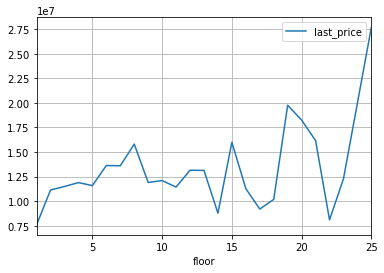

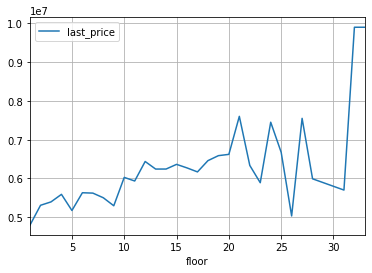

In [194]:
center_St_Peter.pivot_table(index='floor', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Центр')

outskirts_St_Peter.pivot_table(index='floor', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')
plt.show()


Прямопропорциональная зависимоть цены от этажа немного наблюдается на периферии. В центре такой зависимости нет. Это связано с тем, что самые дорогие квартиры находятся в низкоэтажной центральной части города. Резкий рост стоимости происходит центре в 25-ти этажках, а на окраине в 30-ти этажках.

#### Зависимость стоимости квартиры от удаленности от центра

Построим графики зависимости стоимости квартиры от даты публикации обэявдения

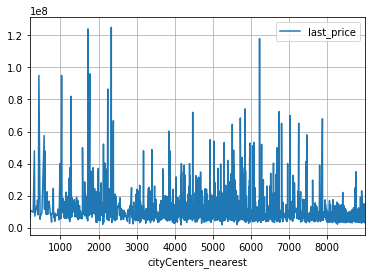

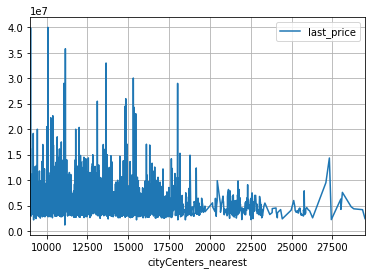

In [195]:
center_St_Peter.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4),  label='Центр')

outskirts_St_Peter.pivot_table(index='cityCenters_nearest', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')
plt.show()


Более сильная зависимость цены на квартиру от рассояния до центра прослеживается на периферии. Повидимому это связано с тем, что ценр и так живет в центре и на графике видно ,что цена очень сильно скачет (большая волатильость),потому, что в центре больше других факторов, влияющих на цену. 

#### Зависимость стоимости квартиры  от даты публикации объявления

Построим графики зависимости стоимости квартиры от даты публикации объявления в центре города и на периферии  

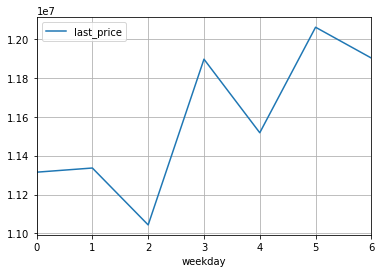

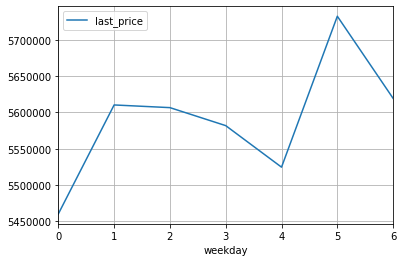

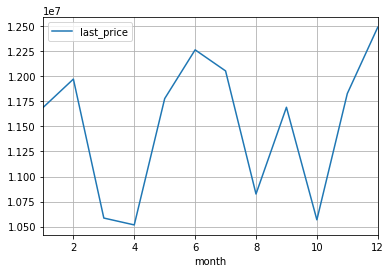

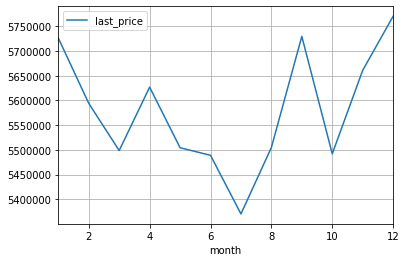

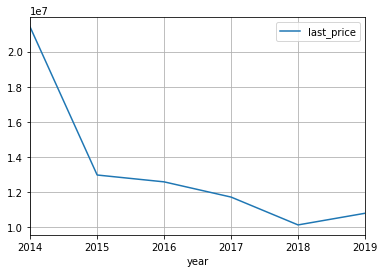

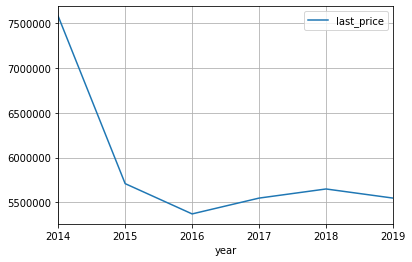

In [196]:
center_St_Peter.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Центр')
outskirts_St_Peter.pivot_table(index='weekday', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')

center_St_Peter.pivot_table(index='month', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Центр')
outskirts_St_Peter.pivot_table(index='month', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')

center_St_Peter.pivot_table(index='year', values='last_price', aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Центр')
outskirts_St_Peter.pivot_table(index='year', values='last_price',aggfunc='mean').plot(grid=True, figsize=(6, 4), label='Периферия')


Средняя стоимость продаваемой недвижимсоти в Центре имеет тенденцию к расту в течение недели, достигая максимума к выходным. Поведение стоимости квартир на периферии похожее. Зависимость от месяцов демонстрирует следующую особенность. В Центре наибольшие продажи приходятся на летние месяцы и декабрь. На периферии наибольшее продажи на осенне-весенний период и декабрь. Темпы продажи дорогих квартир в центре резко упали после кризиса 2014 года и далее плавно снижадись вплоть до 2018 года и потом очень медленно расли до 2019. Стоимость жилья на периферии резко падала до 2016. Потом была небольшая коррекция до 2018 года 

### Шаг 5. Общий вывод

В результате проведенного анализа можно сделать следующий общий вывод:
* Существует зависимость между стоимостью квартир и такими параметрами как:
   - площадь квартиры
   - числа комнат
   - удалённости от центра
   - этаж расположения квартиры
   - Дня недели, месяца и года размещения объявления

* В ряде случаев зависимость носит ярко выраженный характер и выявляется с помощью коэффициента корреляции 
* В других случаях зависимость имеет неинейный неочевидный характер и выявляется с помощью графиков
* По ряду критериев зависимость цены в центре Санкт-Петербурга отличается от цены.